# Part 5 

For part 5 of the project, you will be applying your Linear Regression knowledge to create a Linear Regression model that meets the 4 assumptions of Linear Regression. Additionally, you will then use your model's results to make 3 recommendations for your stakeholder on how to create a successful movie.


# Import

In [37]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Load data 

In [44]:
## Checking what data we already have in our Data folder using os.listdir
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['df_2000_2001.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_combined.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results_2003.json',
 'tmdb_api_results_2004.json',
 'tmdb_api_results_2005.json',
 'tmdb_api_

In [129]:
import glob
## Make a filepath query
q= 'Data/final_tmdb_data_2*.csv.gz'
file_list = sorted(glob.glob(q, recursive=True))
file_list

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz']

In [130]:
## Loading all files as df and appending to a list
df_list = []
for file in file_list:
    temp_df = pd.read_csv(file, index_col=0)
    df_list.append(temp_df)
    
## Concatenating the list of dfs into 1 combined
df = pd.concat(df_list)
df

adult                     backdrop_path belongs_to_collection  \
imdb_id                                                                    
0            NaN                               NaN                   NaN   
tt0113026    0.0  /vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg                   NaN   
tt0113092    0.0                               NaN                   NaN   
tt0116391    0.0                               NaN                   NaN   
tt0118694    0.0  /n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg                   NaN   
...          ...                               ...                   ...   
tt9904004    0.0                               NaN                   NaN   
tt9904802    0.0  /tVa0v0iX7ksdfHtYdTdJglZWy5N.jpg                   NaN   
tt9911196    0.0  /f1WhKsQZEPjOHQ4wTmlq75z0RF6.jpg                   NaN   
tt9916190    0.0  /d98qmYGL6S7ku7txjBvE8Zy0SMQ.jpg                   NaN   
tt9916362    0.0  /imgc14olSDlAlf1z3nC11cL8Zyn.jpg                   NaN   

               budget                                             genres  \
imdb_id                                                                    
0                 NaN                                                NaN   
tt0113026  10000000.0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
tt0113092         0.0           [{'id': 878, 'name': 'Science Fiction'}]   
tt0116391         0.0  [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
tt0118694    150000.0  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
...               ...                                                ...   
tt9904004         0.0                                                 []   
tt9904802         0.0                     [{'id': 10752, 'name': 'War'}]   
tt9911196         0.0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
tt9916190         0.0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
tt9916362         0.0  [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...   

                                                    homepage        id  \
imdb_id                                                                  
0                                                        NaN       NaN   
tt0113026                                                NaN   62127.0   
tt0113092                                                NaN  110977.0   
tt0116391                                                NaN  442869.0   
tt0118694                                                NaN     843.0   
...                                                      ...       ...   
tt9904004                                                NaN  678495.0   
tt9904802     https://gooddeedentertainment.com/enemy-lines/  679796.0   
tt9911196                                                NaN  591915.0   
tt9916190                                                NaN  633490.0   
tt9916362  http://www.avalon.me/production/feature-films/...  655187.0   

          original_language                  original_title  \
imdb_id                                                       
0                       NaN                             NaN   
tt0113026                en                 The Fantasticks   
tt0113092                en                   For the Cause   
tt0116391                hi                            Gang   
tt0118694                cn                            花樣年華   
...                     ...                             ...   
tt9904004                en                  Your Iron Lady   
tt9904802                en                     Enemy Lines   
tt9911196                nl  De Beentjes van Sint-Hildegard   
tt9916190                en                       Safeguard   
tt9916362                eu                        Akelarre   

                                                    overview  ...     revenue  \
imdb_id                                                       ...               
0                                                        NaN  ...         NaN   
tt01130

In [131]:
df.duplicated().sum()

20

In [132]:
df= df.drop_duplicates()
df.duplicated().sum()

0

In [133]:
df.shape

(57595, 25)

In [134]:
df = df.loc[df.index != '0']
df

adult                     backdrop_path belongs_to_collection  \
imdb_id                                                                    
tt0113026    0.0  /vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg                   NaN   
tt0113092    0.0                               NaN                   NaN   
tt0116391    0.0                               NaN                   NaN   
tt0118694    0.0  /n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg                   NaN   
tt0118852    0.0                               NaN                   NaN   
...          ...                               ...                   ...   
tt9904004    0.0                               NaN                   NaN   
tt9904802    0.0  /tVa0v0iX7ksdfHtYdTdJglZWy5N.jpg                   NaN   
tt9911196    0.0  /f1WhKsQZEPjOHQ4wTmlq75z0RF6.jpg                   NaN   
tt9916190    0.0  /d98qmYGL6S7ku7txjBvE8Zy0SMQ.jpg                   NaN   
tt9916362    0.0  /imgc14olSDlAlf1z3nC11cL8Zyn.jpg                   NaN   

               budget                                             genres  \
imdb_id                                                                    
tt0113026  10000000.0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
tt0113092         0.0           [{'id': 878, 'name': 'Science Fiction'}]   
tt0116391         0.0  [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
tt0118694    150000.0  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
tt0118852         0.0                      [{'id': 18, 'name': 'Drama'}]   
...               ...                                                ...   
tt9904004         0.0                                                 []   
tt9904802         0.0                     [{'id': 10752, 'name': 'War'}]   
tt9911196         0.0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
tt9916190         0.0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
tt9916362         0.0  [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...   

                                                    homepage        id  \
imdb_id                                                                  
tt0113026                                                NaN   62127.0   
tt0113092                                                NaN  110977.0   
tt0116391                                                NaN  442869.0   
tt0118694                                                NaN     843.0   
tt0118852                                                NaN   49511.0   
...                                                      ...       ...   
tt9904004                                                NaN  678495.0   
tt9904802     https://gooddeedentertainment.com/enemy-lines/  679796.0   
tt9911196                                                NaN  591915.0   
tt9916190                                                NaN  633490.0   
tt9916362  http://www.avalon.me/production/feature-films/...  655187.0   

          original_language                  original_title  \
imdb_id                                                       
tt0113026                en                 The Fantasticks   
tt0113092                en                   For the Cause   
tt0116391                hi                            Gang   
tt0118694                cn                            花樣年華   
tt0118852                en                  Chinese Coffee   
...                     ...                             ...   
tt9904004                en                  Your Iron Lady   
tt9904802                en                     Enemy Lines   
tt9911196                nl  De Beentjes van Sint-Hildegard   
tt9916190                en                       Safeguard   
tt9916362                eu                        Akelarre   

                                                    overview  ...     revenue  \
imdb_id                                                       ...               
tt0113026  Two rural teens sing and dance their way throu...  ...         0.0   
tt01130

#### Make sure to only keep:
- Status=Released.
- Budget >0
- Revenue >0

In [135]:
## Check status
df['status'].value_counts()

Released           57581
Post Production       11
In Production          2
Name: status, dtype: int64

In [136]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

adult                     backdrop_path belongs_to_collection  \
imdb_id                                                                    
tt0113026    0.0  /vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg                   NaN   
tt0113092    0.0                               NaN                   NaN   
tt0116391    0.0                               NaN                   NaN   
tt0118694    0.0  /n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg                   NaN   
tt0118852    0.0                               NaN                   NaN   
...          ...                               ...                   ...   
tt9904004    0.0                               NaN                   NaN   
tt9904802    0.0  /tVa0v0iX7ksdfHtYdTdJglZWy5N.jpg                   NaN   
tt9911196    0.0  /f1WhKsQZEPjOHQ4wTmlq75z0RF6.jpg                   NaN   
tt9916190    0.0  /d98qmYGL6S7ku7txjBvE8Zy0SMQ.jpg                   NaN   
tt9916362    0.0  /imgc14olSDlAlf1z3nC11cL8Zyn.jpg                   NaN   

               budget                                             genres  \
imdb_id                                                                    
tt0113026  10000000.0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
tt0113092         0.0           [{'id': 878, 'name': 'Science Fiction'}]   
tt0116391         0.0  [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
tt0118694    150000.0  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
tt0118852         0.0                      [{'id': 18, 'name': 'Drama'}]   
...               ...                                                ...   
tt9904004         0.0                                                 []   
tt9904802         0.0                     [{'id': 10752, 'name': 'War'}]   
tt9911196         0.0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
tt9916190         0.0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
tt9916362         0.0  [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...   

                                                    homepage        id  \
imdb_id                                                                  
tt0113026                                                NaN   62127.0   
tt0113092                                                NaN  110977.0   
tt0116391                                                NaN  442869.0   
tt0118694                                                NaN     843.0   
tt0118852                                                NaN   49511.0   
...                                                      ...       ...   
tt9904004                                                NaN  678495.0   
tt9904802     https://gooddeedentertainment.com/enemy-lines/  679796.0   
tt9911196                                                NaN  591915.0   
tt9916190                                                NaN  633490.0   
tt9916362  http://www.avalon.me/production/feature-films/...  655187.0   

          original_language                  original_title  \
imdb_id                                                       
tt0113026                en                 The Fantasticks   
tt0113092                en                   For the Cause   
tt0116391                hi                            Gang   
tt0118694                cn                            花樣年華   
tt0118852                en                  Chinese Coffee   
...                     ...                             ...   
tt9904004                en                  Your Iron Lady   
tt9904802                en                     Enemy Lines   
tt9911196                nl  De Beentjes van Sint-Hildegard   
tt9916190                en                       Safeguard   
tt9916362                eu                        Akelarre   

                                                    overview  ...  \
imdb_id                                                       ...   
tt0113026  Two rural teens sing and dance their way throu...  ...   
tt0113092  Earth is in a state of constant 

In [137]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

adult                     backdrop_path  \
imdb_id                                              
tt0118694    0.0  /n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg   
tt0120467    0.0  /knok3mNReKqPTplnnqz7E4dd7mD.jpg   
tt0120630    0.0  /t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg   
tt0120753    0.0  /3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg   
tt0120755    0.0  /24DZfupDlhXeTchmcOkoGRhP5Vg.jpg   
...          ...                               ...   
tt9735462    0.0  /18diCYWCxODOpeJNV89hoPyobxj.jpg   
tt9770150    0.0  /563sRDK3rZS31TXCdTY4lfcwrNK.jpg   
tt9839038    0.0  /gq9FvopuQeGs6TKljGghefC14uD.jpg   
tt9877170    0.0  /3e46k8KPCs1N7luAqNDFZFzrbbE.jpg   
tt9883996    0.0  /wkaKu3gwAcw3n1mqfFmwNfPGasX.jpg   

                                       belongs_to_collection       budget  \
imdb_id                                                                     
tt0118694                                                NaN     150000.0   
tt0120467                                                NaN     120000.0   
tt0120630  {'id': 718551, 'name': 'Chicken Run Collection...   45000000.0   
tt0120753                                                NaN    8000000.0   
tt0120755  {'id': 87359, 'name': 'Mission: Impossible Col...  125000000.0   
...                                                      ...          ...   
tt9735462                                                NaN   25900000.0   
tt9770150                                                NaN    5000000.0   
tt9839038  {'id': 723457, 'name': 'Jim Button Collection'...   20000000.0   
tt9877170                                                NaN    7907534.0   
tt9883996                                                NaN   20000000.0   

                                                      genres  \
imdb_id                                                        
tt0118694  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
tt0120467  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...   
tt0120630  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
tt0120753  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
tt0120755  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
...                                                      ...   
tt9735462  [{'id': 10402, 'name': 'Music'}, {'id': 35, 'n...   
tt9770150                      [{'id': 18, 'name': 'Drama'}]   
tt9839038  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
tt9877170  [{'id': 10749, 'name': 'Romance'}, {'id': 28, ...   
tt9883996  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

                                                homepage        id  \
imdb_id                                                              
tt0118694                                            NaN     843.0   
tt0120467                                            NaN   19085.0   
tt0120630                                            NaN    7443.0   
tt0120753                                            NaN     318.0   
tt0120755                                            NaN     955.0   
...                                                  ...       ...   
tt9735462                                            NaN  498402.0   
tt9770150  https://www.searchlightpictures.com/nomadland  581734.0   
tt9839038                                            NaN  616180.0   
tt9877170                                            NaN  661043.0   
tt9883996    https://bleeckerstreetmedia.com/dream-horse  603206.0   

          original_language              original_title  \
imdb_id                                                   
tt0118694                cn                        花樣年華   
tt0120467                en                      Vulgar   
tt0120630                en                 Chicken Run   
tt0120753                en    The Million Dollar Hotel   
tt0120755                en      Mission: Impossible II   
...                     ...                         ...   
tt9735462                fr                       Aline   
tt9770150                en    

# Preprocessing

In [138]:
df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'video', 'vote_average',
       'vote_count', 'certification'],
      dtype='object')

In [139]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', 
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

adult                              belongs_to_collection  \
imdb_id                                                               
tt0118694    0.0                                                NaN   
tt0120467    0.0                                                NaN   
tt0120630    0.0  {'id': 718551, 'name': 'Chicken Run Collection...   
tt0120753    0.0                                                NaN   
tt0120755    0.0  {'id': 87359, 'name': 'Mission: Impossible Col...   
...          ...                                                ...   
tt9735462    0.0                                                NaN   
tt9770150    0.0                                                NaN   
tt9839038    0.0  {'id': 723457, 'name': 'Jim Button Collection'...   
tt9877170    0.0                                                NaN   
tt9883996    0.0                                                NaN   

                budget                                             genres  \
imdb_id                                                                     
tt0118694     150000.0  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
tt0120467     120000.0  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...   
tt0120630   45000000.0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
tt0120753    8000000.0  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
tt0120755  125000000.0  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
...                ...                                                ...   
tt9735462   25900000.0  [{'id': 10402, 'name': 'Music'}, {'id': 35, 'n...   
tt9770150    5000000.0                      [{'id': 18, 'name': 'Drama'}]   
tt9839038   20000000.0  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
tt9877170    7907534.0  [{'id': 10749, 'name': 'Romance'}, {'id': 28, ...   
tt9883996   20000000.0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

           popularity                               production_companies  \
imdb_id                                                                    
tt0118694      24.889  [{'id': 255, 'logo_path': None, 'name': 'Parad...   
tt0120467       4.182  [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...   
tt0120630      46.941  [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...   
tt0120753      14.477  [{'id': 1490, 'logo_path': None, 'name': 'Kint...   
tt0120755      33.420  [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...   
...               ...                                                ...   
tt9735462       7.482                                                 []   
tt9770150      24.531                                                 []   
tt9839038       4.533                                                 []   
tt9877170       5.279                                                 []   
tt9883996      10.826                                                 []   

          release_date      revenue  runtime                       title  \
imdb_id                                                                    
tt0118694   2000-09-29   12854953.0     99.0        In the Mood for Love   
tt0120467   2002-04-26      14904.0     87.0                      Vulgar   
tt0120630   2000-06-21  224834564.0     84.0                 Chicken Run   
tt0120753   2000-02-09     105983.0    122.0    The Million Dollar Hotel   
tt0120755   2000-05-24  546388105.0    123.0      Mission: Impossible II   
...                ...          ...      ...                         ...   
tt9735462   2020-11-19   11131254.0    126.0                       Aline   
tt9770150   2020-12-04   14784114.0    108.0                   Nomadland   
tt9839038   2020-10-01    6700000.0    110.0  Jim Button and the Wild 13   
tt9877170   2020-02-06   11136444.0    135.0                      Malang   
tt9883996   2021-05-21    6435260.0    113.0                 Dream Horse   

           vote_average  vote_count certification  
imdb_id                                            
tt0

In [140]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'certification'],
      dtype='object')

## Feature Engineering

- belongs to collection: convert to boolean
- Genres: get just name and manually OHE
- Cleaning Categories in Certification
- Converting release date to year, month, and day.

### belongs to collection: convert to boolean

In [141]:
df['belongs_to_collection'].value_counts()

{'id': 9485, 'name': 'The Fast and the Furious Collection', 'poster_path': '/yvr1Ziehgps1VJyug8nnezTJRJW.jpg', 'backdrop_path': '/gC9BUFiROWtaMsluGYziZ6lR4OJ.jpg'}    8
{'id': 656, 'name': 'Saw Collection', 'poster_path': '/xmC2A7qPEfiOkQC58fZh8srWQ5v.jpg', 'backdrop_path': '/oLfS1lOmN2KIU2IQ200SDEPVEZe.jpg'}                          8
{'id': 1241, 'name': 'Harry Potter Collection', 'poster_path': '/eVPs2Y0LyvTLZn6AP5Z6O2rtiGB.jpg', 'backdrop_path': '/4gV0rKUjB1nLUdZB4zIltLvNZZr.jpg'}                8
{'id': 748, 'name': 'X-Men Collection', 'poster_path': '/31rqs6ZxFdi5nWZZaFPIr17q8jt.jpg', 'backdrop_path': '/roZFGw3Rg6VOYty9y4r5WvgvXoC.jpg'}                        7
{'id': 17255, 'name': 'Resident Evil Collection', 'poster_path': '/ed8cYt6V7DVoVuHhBV5dD2YRFvb.jpg', 'backdrop_path': '/8utTJ9WoQeYcZ0Ztciv6auqwLXl.jpg'}              6
                                                                                                                                                           

In [142]:
df['belongs_to_collection'] = df['belongs_to_collection'].notna()

In [143]:
df['belongs_to_collection'].value_counts()

False    4015
True     1124
Name: belongs_to_collection, dtype: int64

### genre

In [144]:
df['genres']

imdb_id
tt0118694    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
tt0120467    [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...
tt0120630    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
tt0120753    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
tt0120755    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...
                                   ...                        
tt9735462    [{'id': 10402, 'name': 'Music'}, {'id': 35, 'n...
tt9770150                        [{'id': 18, 'name': 'Drama'}]
tt9839038    [{'id': 12, 'name': 'Adventure'}, {'id': 10751...
tt9877170    [{'id': 10749, 'name': 'Romance'}, {'id': 28, ...
tt9883996    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
Name: genres, Length: 5139, dtype: object

In [145]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [146]:
## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

adult  belongs_to_collection      budget  \
imdb_id                                               
tt0118694    0.0                  False    150000.0   
tt0118694    0.0                  False    150000.0   
tt0120467    0.0                  False    120000.0   
tt0120467    0.0                  False    120000.0   
tt0120467    0.0                  False    120000.0   
...          ...                    ...         ...   
tt9877170    0.0                  False   7907534.0   
tt9877170    0.0                  False   7907534.0   
tt9877170    0.0                  False   7907534.0   
tt9883996    0.0                  False  20000000.0   
tt9883996    0.0                  False  20000000.0   

                                                      genres  popularity  \
imdb_id                                                                    
tt0118694  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      24.889   
tt0118694  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      24.889   
tt0120467  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...       4.182   
tt0120467  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...       4.182   
tt0120467  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...       4.182   
...                                                      ...         ...   
tt9877170  [{'id': 10749, 'name': 'Romance'}, {'id': 28, ...       5.279   
tt9877170  [{'id': 10749, 'name': 'Romance'}, {'id': 28, ...       5.279   
tt9877170  [{'id': 10749, 'name': 'Romance'}, {'id': 28, ...       5.279   
tt9883996  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...      10.826   
tt9883996  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...      10.826   

                                        production_companies release_date  \
imdb_id                                                                     
tt0118694  [{'id': 255, 'logo_path': None, 'name': 'Parad...   2000-09-29   
tt0118694  [{'id': 255, 'logo_path': None, 'name': 'Parad...   2000-09-29   
tt0120467  [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...   2002-04-26   
tt0120467  [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...   2002-04-26   
tt0120467  [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...   2002-04-26   
...                                                      ...          ...   
tt9877170                                                 []   2020-02-06   
tt9877170                                                 []   2020-02-06   
tt9877170                                                 []   2020-02-06   
tt9883996                                                 []   2021-05-21   
tt9883996                                                 []   2021-05-21   

              revenue  runtime                 title  vote_average  \
imdb_id                                                              
tt0118694  12854953.0     99.0  In the Mood for Love         8.100   
tt0118694  12854953.0     99.0  In the Mood for Love         8.100   
tt0120467     14904.0     87.0                Vulgar         5.400   
tt0120467     14904.0     87.0                Vulgar         5.400   
tt0120467     14904.0     87.0                Vulgar         5.400   
...               ...      ...                   ...           ...   
tt9877170  11136444.0    135.0                Malang         7.200   
tt9877170  11136444.0    135.0                Malang         7.200   
tt9877170  11136444.0    135.0                Malang         7.200   
tt9883996   6435260.0    113.0           Dream Horse         7.096   
tt9883996   6435260.0    113.0           Dream Horse         7.096   

           vote_count certification genres_list  
imdb_id                                          
tt0118694      2070.0            PG       Drama  
tt0118694      2070.0            PG     Romance  
tt0120467        42.0             R       Drama  
tt0120467        42.0             R      Horror  
tt0120467        42.0             R    Thriller  
...               ...           ...        

In [147]:
## save unique genres

unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Drama', 'Romance', 'Horror', 'Thriller', 'Crime', 'Animation',
       'Comedy', 'Family', 'Adventure', 'Action', 'Science Fiction',
       'Fantasy', 'Mystery', 'War', 'History', 'Music', 'Western',
       'Documentary'], dtype=object)

In [148]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df

adult  belongs_to_collection       budget  \
imdb_id                                                
tt0118694    0.0                  False     150000.0   
tt0120467    0.0                  False     120000.0   
tt0120630    0.0                   True   45000000.0   
tt0120753    0.0                  False    8000000.0   
tt0120755    0.0                   True  125000000.0   
...          ...                    ...          ...   
tt9735462    0.0                  False   25900000.0   
tt9770150    0.0                  False    5000000.0   
tt9839038    0.0                   True   20000000.0   
tt9877170    0.0                  False    7907534.0   
tt9883996    0.0                  False   20000000.0   

                                                      genres  popularity  \
imdb_id                                                                    
tt0118694  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      24.889   
tt0120467  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...       4.182   
tt0120630  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...      46.941   
tt0120753  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...      14.477   
tt0120755  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...      33.420   
...                                                      ...         ...   
tt9735462  [{'id': 10402, 'name': 'Music'}, {'id': 35, 'n...       7.482   
tt9770150                      [{'id': 18, 'name': 'Drama'}]      24.531   
tt9839038  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...       4.533   
tt9877170  [{'id': 10749, 'name': 'Romance'}, {'id': 28, ...       5.279   
tt9883996  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...      10.826   

                                        production_companies release_date  \
imdb_id                                                                     
tt0118694  [{'id': 255, 'logo_path': None, 'name': 'Parad...   2000-09-29   
tt0120467  [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...   2002-04-26   
tt0120630  [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...   2000-06-21   
tt0120753  [{'id': 1490, 'logo_path': None, 'name': 'Kint...   2000-02-09   
tt0120755  [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...   2000-05-24   
...                                                      ...          ...   
tt9735462                                                 []   2020-11-19   
tt9770150                                                 []   2020-12-04   
tt9839038                                                 []   2020-10-01   
tt9877170                                                 []   2020-02-06   
tt9883996                                                 []   2021-05-21   

               revenue  runtime                       title  ...  \
imdb_id                                                      ...   
tt0118694   12854953.0     99.0        In the Mood for Love  ...   
tt0120467      14904.0     87.0                      Vulgar  ...   
tt0120630  224834564.0     84.0                 Chicken Run  ...   
tt0120753     105983.0    122.0    The Million Dollar Hotel  ...   
tt0120755  546388105.0    123.0      Mission: Impossible II  ...   
...                ...      ...                         ...  ...   
tt9735462   11131254.0    126.0                       Aline  ...   
tt9770150   14784114.0    108.0                   Nomadland  ...   
tt9839038    6700000.0    110.0  Jim Button and the Wild 13  ...   
tt9877170   11136444.0    135.0                      Malang  ...   
tt9883996    6435260.0    113.0                 Dream Horse  ...   

           Genre_Adventure  Genre_Action Genre_Science Fiction Genre_Fantasy  \
imdb_id                                                                        
tt0118694            False         False                 False         False   
tt0120467            False         False                 False         False   
tt0120630            False         False                 False         False   
tt0120

In [149]:
## Drop original genre cols
df  = df.drop(columns=['genres','genres_list'])
df

adult  belongs_to_collection       budget  popularity  \
imdb_id                                                            
tt0118694    0.0                  False     150000.0      24.889   
tt0120467    0.0                  False     120000.0       4.182   
tt0120630    0.0                   True   45000000.0      46.941   
tt0120753    0.0                  False    8000000.0      14.477   
tt0120755    0.0                   True  125000000.0      33.420   
...          ...                    ...          ...         ...   
tt9735462    0.0                  False   25900000.0       7.482   
tt9770150    0.0                  False    5000000.0      24.531   
tt9839038    0.0                   True   20000000.0       4.533   
tt9877170    0.0                  False    7907534.0       5.279   
tt9883996    0.0                  False   20000000.0      10.826   

                                        production_companies release_date  \
imdb_id                                                                     
tt0118694  [{'id': 255, 'logo_path': None, 'name': 'Parad...   2000-09-29   
tt0120467  [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...   2002-04-26   
tt0120630  [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...   2000-06-21   
tt0120753  [{'id': 1490, 'logo_path': None, 'name': 'Kint...   2000-02-09   
tt0120755  [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...   2000-05-24   
...                                                      ...          ...   
tt9735462                                                 []   2020-11-19   
tt9770150                                                 []   2020-12-04   
tt9839038                                                 []   2020-10-01   
tt9877170                                                 []   2020-02-06   
tt9883996                                                 []   2021-05-21   

               revenue  runtime                       title  vote_average  \
imdb_id                                                                     
tt0118694   12854953.0     99.0        In the Mood for Love         8.100   
tt0120467      14904.0     87.0                      Vulgar         5.400   
tt0120630  224834564.0     84.0                 Chicken Run         6.735   
tt0120753     105983.0    122.0    The Million Dollar Hotel         5.904   
tt0120755  546388105.0    123.0      Mission: Impossible II         6.109   
...                ...      ...                         ...           ...   
tt9735462   11131254.0    126.0                       Aline         6.800   
tt9770150   14784114.0    108.0                   Nomadland         7.260   
tt9839038    6700000.0    110.0  Jim Button and the Wild 13         6.183   
tt9877170   11136444.0    135.0                      Malang         7.200   
tt9883996    6435260.0    113.0                 Dream Horse         7.096   

           ...  Genre_Adventure Genre_Action  Genre_Science Fiction  \
imdb_id    ...                                                        
tt0118694  ...            False        False                  False   
tt0120467  ...            False        False                  False   
tt0120630  ...            False        False                  False   
tt0120753  ...            False        False                  False   
tt0120755  ...             True         True                  False   
...        ...              ...          ...                    ...   
tt9735462  ...            False        False                  False   
tt9770150  ...            False        False                  False   
tt9839038  ...             True        False                  False   
tt9877170  ...            False         True                  False   
tt9883996  ...            False        False                  False   

           Genre_Fantasy  Genre_Mystery  Genre_War  Genre_History  \
imdb_id                                                             
tt0118694          False          False      False          

### Certification

In [150]:
## Checking Certification values counts
df['certification'].value_counts(dropna=False)

R        1722
PG-13    1431
NaN      1201
PG        531
NR        152
G          87
NC-17      14
R           1
Name: certification, dtype: int64

In [151]:
# fix extra space certs

df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna=False)

R        1723
PG-13    1431
NaN      1201
PG        531
NR        152
G          87
NC-17      14
Name: certification, dtype: int64

In [152]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

R        1723
PG-13    1431
NaN      1201
PG        531
NR        152
G          87
NC-17      14
Name: certification, dtype: int64

### Converting year to sep features

In [153]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True).copy()
df[new_cols] = df[new_cols].astype(float)
df

adult  belongs_to_collection       budget  popularity  \
imdb_id                                                            
tt0118694    0.0                  False     150000.0      24.889   
tt0120467    0.0                  False     120000.0       4.182   
tt0120630    0.0                   True   45000000.0      46.941   
tt0120753    0.0                  False    8000000.0      14.477   
tt0120755    0.0                   True  125000000.0      33.420   
...          ...                    ...          ...         ...   
tt9735462    0.0                  False   25900000.0       7.482   
tt9770150    0.0                  False    5000000.0      24.531   
tt9839038    0.0                   True   20000000.0       4.533   
tt9877170    0.0                  False    7907534.0       5.279   
tt9883996    0.0                  False   20000000.0      10.826   

                                        production_companies release_date  \
imdb_id                                                                     
tt0118694  [{'id': 255, 'logo_path': None, 'name': 'Parad...   2000-09-29   
tt0120467  [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...   2002-04-26   
tt0120630  [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...   2000-06-21   
tt0120753  [{'id': 1490, 'logo_path': None, 'name': 'Kint...   2000-02-09   
tt0120755  [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...   2000-05-24   
...                                                      ...          ...   
tt9735462                                                 []   2020-11-19   
tt9770150                                                 []   2020-12-04   
tt9839038                                                 []   2020-10-01   
tt9877170                                                 []   2020-02-06   
tt9883996                                                 []   2021-05-21   

               revenue  runtime                       title  vote_average  \
imdb_id                                                                     
tt0118694   12854953.0     99.0        In the Mood for Love         8.100   
tt0120467      14904.0     87.0                      Vulgar         5.400   
tt0120630  224834564.0     84.0                 Chicken Run         6.735   
tt0120753     105983.0    122.0    The Million Dollar Hotel         5.904   
tt0120755  546388105.0    123.0      Mission: Impossible II         6.109   
...                ...      ...                         ...           ...   
tt9735462   11131254.0    126.0                       Aline         6.800   
tt9770150   14784114.0    108.0                   Nomadland         7.260   
tt9839038    6700000.0    110.0  Jim Button and the Wild 13         6.183   
tt9877170   11136444.0    135.0                      Malang         7.200   
tt9883996    6435260.0    113.0                 Dream Horse         7.096   

           ...  Genre_Fantasy Genre_Mystery  Genre_War  Genre_History  \
imdb_id    ...                                                          
tt0118694  ...          False         False      False          False   
tt0120467  ...          False         False      False          False   
tt0120630  ...          False         False      False          False   
tt0120753  ...          False         False      False          False   
tt0120755  ...          False         False      False          False   
...        ...            ...           ...        ...            ...   
tt9735462  ...          False         False      False          False   
tt9770150  ...          False         False      False          False   
tt9839038  ...           True         False      False          False   
tt9877170  ...          False         False      False          False   
tt9883996  ...          False         False      False          False   

           Genre_Music  Genre_Western  Genre_Documentary    year  month   day  
imdb_id                                                                        
tt0118694   

In [154]:
## drop original feature
df = df.drop(columns=['release_date'])

In [94]:
## saving the partially preprocessed csv to disk

df.to_csv('Data/combined_tmdb_data.csv.gz',compression='gzip',index=False)#,line_terminator='\n')
pd.read_csv('Data/combined_tmdb_data.csv.gz', lineterminator="\n")

adult  belongs_to_collection      budget  popularity  \
0        0.0                  False  10000000.0       3.291   
1        0.0                  False         0.0       2.566   
2        0.0                  False         0.0       0.840   
3        0.0                  False    150000.0      24.889   
4        0.0                  False         0.0       3.993   
...      ...                    ...         ...         ...   
57589    0.0                  False         0.0       0.600   
57590    0.0                  False         0.0       4.922   
57591    0.0                  False         0.0       2.845   
57592    0.0                  False         0.0       2.369   
57593    0.0                  False         0.0       9.778   

                                    production_companies     revenue  runtime  \
0      [{'id': 60, 'logo_path': '/1SEj4nyG3JPBSKBbFht...         0.0     86.0   
1      [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...         0.0    100.0   
2                                                     []         0.0    152.0   
3      [{'id': 255, 'logo_path': None, 'name': 'Parad...  12854953.0     99.0   
4      [{'id': 1596, 'logo_path': None, 'name': 'Shoo...         0.0     99.0   
...                                                  ...         ...      ...   
57589                                                 []         0.0     92.0   
57590                                                 []         0.0     92.0   
57591                                                 []         0.0    103.0   
57592                                                 []         0.0     94.0   
57593                                                 []         0.0     92.0   

                      title  vote_average  vote_count  ... Genre_History  \
0           The Fantasticks         5.500        22.0  ...         False   
1             For the Cause         5.100         8.0  ...         False   
2                      Gang         4.000         1.0  ...         False   
3      In the Mood for Love         8.100      2070.0  ...         False   
4            Chinese Coffee         6.813        48.0  ...         False   
...                     ...           ...         ...  ...           ...   
57589        Your Iron Lady         3.700         3.0  ...         False   
57590           Enemy Lines         5.400        28.0  ...         False   
57591   The Marriage Escape         7.806        31.0  ...         False   
57592             Safeguard         6.500         2.0  ...         False   
57593                 Coven         6.734       250.0  ...          True   

       Genre_Family  Genre_Mystery  Genre_Western  Genre_War  Genre_TV Movie  \
0             False          False          False      False           False   
1             False          False          False      False           False   
2             False          False          False      False           False   
3             False          False          False      False           False   
4             False          False          False      False           False   
...             ...            ...            ...        ...             ...   
57589         False          False          False      False           False   
57590         False          False          False       True           False   
57591         False          False          False      False           False   
57592         False          False          False      False           False   
57593         False          False          False      False           False   

       Genre_Documentary    year  month   day\r  
0                  False  2000.0    9.0  22.0\r  
1                  False  2000.0   11.0  15.0\r  
2                  False  2000.0    4.0  14.0\r  
3                  False  2000.0    9.0  29.0\r  
4                  False  2000.0    9.0   2.0\r  
...                  ...     ...    ...     ...  
57589              False  2020.0    1.0  23.0\r  
575

### Production Company

In [155]:
df['production_companies']

imdb_id
tt0118694    [{'id': 255, 'logo_path': None, 'name': 'Parad...
tt0120467    [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...
tt0120630    [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...
tt0120753    [{'id': 1490, 'logo_path': None, 'name': 'Kint...
tt0120755    [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...
                                   ...                        
tt9735462                                                   []
tt9770150                                                   []
tt9839038                                                   []
tt9877170                                                   []
tt9883996                                                   []
Name: production_companies, Length: 5139, dtype: object

In [156]:
## getting longest string to check for multiple companies
idxmax = df['production_companies'].apply(len).idxmax()
idxmax

'tt0168629'

In [157]:
test = df.loc[idxmax, 'production_companies']
test

"[{'id': 8, 'logo_path': '/78ilmDNTpdCfsakrsLqmAUkFTrO.png', 'name': 'Fine Line Features', 'origin_country': ''}, {'id': 46, 'logo_path': '/3xFdKHLXPGHEbrAkmsepGE8974Y.png', 'name': 'WDR', 'origin_country': 'DE'}, {'id': 47, 'logo_path': '/i7Z9ot2o3N5Sa3HrF09kniFs2y8.png', 'name': 'Constantin Film', 'origin_country': 'DE'}, {'id': 76, 'logo_path': '/nebkQYtQKhZyHJfh5v0oGpNbPzu.png', 'name': 'Zentropa Entertainments', 'origin_country': 'DK'}, {'id': 94, 'logo_path': '/huC7HqorvUThGIrENrbcHmQVUA0.png', 'name': 'ARTE France Cinéma', 'origin_country': 'FR'}, {'id': 104, 'logo_path': '/9aotxauvc9685tq9pTcRJszuT06.png', 'name': 'Canal+', 'origin_country': 'FR'}, {'id': 119, 'logo_path': '/1di2gITGUZr730AMuMKiCrP90Vl.png', 'name': 'DR', 'origin_country': 'DK'}, {'id': 157, 'logo_path': None, 'name': 'SVT Drama', 'origin_country': ''}, {'id': 201, 'logo_path': '/6UIpEURdjnmcJPwgTDRzVRuwADr.png', 'name': 'ARTE', 'origin_country': 'FR'}, {'id': 321, 'logo_path': '/pfp6VWF3tYfOHHVRHpYe2iGcYrf.png

In [158]:
# using regular expressions to extrap just the name
import re
exp= r"\'name\'\:.?\'(\w*.*?)\'"
re.findall(exp, test)

['Fine Line Features',
 'WDR',
 'Constantin Film',
 'Zentropa Entertainments',
 'ARTE France Cinéma',
 'Canal+',
 'DR',
 'SVT Drama',
 'ARTE',
 'Memfis Film',
 'TV 1000 Sverige',
 'France 3 Cinéma',
 'Film i Väst',
 'Angel films',
 'YLE',
 'Film4 Productions',
 'Blind Spot Pictures',
 'VPRO',
 'Liberator Productions',
 'Íslenska kvikmyndasamsteypan',
 'Pain Unlimited GmbH Filmproduktion',
 'Trust Film Svenska',
 'Cinematograph A/S',
 'What Else? B.V',
 'Filmek A/S',
 'Lantia Cinema & Audiovisivi']

In [159]:
def get_prod_company_names(x):
    if x=='[]':
        return ["MISSING"]
    
    exp= r"\'name\'\:.?\'(\w*.*?)\'"
    companies = re.findall(exp, x)
    return companies

In [160]:
## test function
get_prod_company_names(test)

['Fine Line Features',
 'WDR',
 'Constantin Film',
 'Zentropa Entertainments',
 'ARTE France Cinéma',
 'Canal+',
 'DR',
 'SVT Drama',
 'ARTE',
 'Memfis Film',
 'TV 1000 Sverige',
 'France 3 Cinéma',
 'Film i Väst',
 'Angel films',
 'YLE',
 'Film4 Productions',
 'Blind Spot Pictures',
 'VPRO',
 'Liberator Productions',
 'Íslenska kvikmyndasamsteypan',
 'Pain Unlimited GmbH Filmproduktion',
 'Trust Film Svenska',
 'Cinematograph A/S',
 'What Else? B.V',
 'Filmek A/S',
 'Lantia Cinema & Audiovisivi']

In [161]:
## Save new clean prod_comapny col and explode
df['prod_company'] = df['production_companies'].apply(get_prod_company_names)
prod_companies = df['prod_company'].explode()
prod_companies.value_counts().head(49)

MISSING                      2116
Universal Pictures            170
Warner Bros. Pictures         146
Columbia Pictures             131
20th Century Fox              116
Paramount                      99
Lionsgate                      98
Canal+                         83
New Line Cinema                76
Walt Disney Pictures           69
Relativity Media               64
StudioCanal                    58
TSG Entertainment              53
Summit Entertainment           52
Blumhouse Productions          52
Village Roadshow Pictures      51
Metro-Goldwyn-Mayer            51
DreamWorks Pictures            47
Film4 Productions              40
Dune Entertainment             38
Sony Pictures                  38
Screen Gems                    36
Focus Features                 36
Fox Searchlight Pictures       35
Regency Enterprises            34
Legendary Pictures             34
Working Title Films            33
Ciné+                          32
FilmNation Entertainment       32
TF1 Films Prod

In [162]:
prod_companies.nunique()

4443

- Common Prod Company Encoding:
- Keep top 50 most common companies an one hot encode

In [163]:
## saving the 50 most common companies
common_companies = sorted(prod_companies.value_counts().head(50).index)
common_companies

['20th Century Fox',
 'Amblin Entertainment',
 'BBC Film',
 'Blumhouse Productions',
 'Canal+',
 'Ciné+',
 'Columbia Pictures',
 'DreamWorks Pictures',
 'Dune Entertainment',
 'EuropaCorp',
 'Film i Väst',
 'Film4 Productions',
 'FilmNation Entertainment',
 'Focus Features',
 'Fox 2000 Pictures',
 'Fox Searchlight Pictures',
 'France 2 Cinéma',
 'France 3 Cinéma',
 'IM Global',
 'Ingenious Media',
 'Legendary Pictures',
 'Lionsgate',
 'MISSING',
 'Metro-Goldwyn-Mayer',
 'Millennium Films',
 'New Line Cinema',
 'New Regency Pictures',
 'Original Film',
 'Paramount',
 'Participant',
 'Pathé',
 'RatPac Entertainment',
 'Regency Enterprises',
 'Relativity Media',
 'Reliance Entertainment',
 'Scott Free Productions',
 'Scott Rudin Productions',
 'Screen Gems',
 'Sony Pictures',
 'StudioCanal',
 'Summit Entertainment',
 'TF1 Films Production',
 'TSG Entertainment',
 'The Weinstein Company',
 'Touchstone Pictures',
 'Universal Pictures',
 'Village Roadshow Pictures',
 'Walt Disney Pictures',


In [165]:
## manually ohe top 20 companies
for company in common_companies:
    df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)

In [167]:
## Dropping columns
drop_for_model = ['title','prod_company','production_companies']
df = df.drop(columns=drop_for_model)
df

adult  belongs_to_collection       budget  popularity      revenue  \
imdb_id                                                                         
tt0118694    0.0                  False     150000.0      24.889   12854953.0   
tt0120467    0.0                  False     120000.0       4.182      14904.0   
tt0120630    0.0                   True   45000000.0      46.941  224834564.0   
tt0120753    0.0                  False    8000000.0      14.477     105983.0   
tt0120755    0.0                   True  125000000.0      33.420  546388105.0   
...          ...                    ...          ...         ...          ...   
tt9735462    0.0                  False   25900000.0       7.482   11131254.0   
tt9770150    0.0                  False    5000000.0      24.531   14784114.0   
tt9839038    0.0                   True   20000000.0       4.533    6700000.0   
tt9877170    0.0                  False    7907534.0       5.279   11136444.0   
tt9883996    0.0                  False   20000000.0      10.826    6435260.0   

           runtime  vote_average  vote_count certification  Genre_Drama  ...  \
imdb_id                                                                  ...   
tt0118694     99.0         8.100      2070.0            PG         True  ...   
tt0120467     87.0         5.400        42.0             R         True  ...   
tt0120630     84.0         6.735      4213.0             G        False  ...   
tt0120753    122.0         5.904       260.0             R         True  ...   
tt0120755    123.0         6.109      5581.0         PG-13        False  ...   
...            ...           ...         ...           ...          ...  ...   
tt9735462    126.0         6.800       265.0         PG-13         True  ...   
tt9770150    108.0         7.260      2521.0             R         True  ...   
tt9839038    110.0         6.183        30.0           NaN        False  ...   
tt9877170    135.0         7.200        37.0           NaN         True  ...   
tt9883996    113.0         7.096        89.0           NaN         True  ...   

           ProdComp_Summit Entertainment  ProdComp_TF1 Films Production  \
imdb_id                                                                   
tt0118694                          False                          False   
tt0120467                          False                          False   
tt0120630                          False                          False   
tt0120753                          False                          False   
tt0120755                          False                          False   
...                                  ...                            ...   
tt9735462                          False                          False   
tt9770150                          False                          False   
tt9839038                          False                          False   
tt9877170                          False                          False   
tt9883996                          False                          False   

           ProdComp_TSG Entertainment  ProdComp_The Weinstein Company  \
imdb_id                                                                 
tt0118694                       False                           False   
tt0120467                       False                           False   
tt0120630                       False                           False   
tt0120753                       False                           False   
tt0120755                       False                           False   
...                               ...                             ...   
tt9735462                       False                           False   
tt9770150                       False                           False   
tt9839038                       False                           False   
tt9877170                       False                           False   
tt9883996                       False                           

# Linear Regression

## The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:

1 -   Linearity: That the input features have a linear relationship with the target.

2 -  Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.

3 - Normality: The model's residuals are approximately normally distributed.

4 - Homoscedasticity: The model residuals have equal variance across all predictions.

## 1 - Checking for Linearity

In [182]:
## save plot_cols list to show (dropping genre from plot_df from pair_plot)
genre_cols = [c for c in df if c.startswith('Genre')]
comp_cols = [c for c in df if c.startswith('ProdComp')]

plot_cols = df.drop(columns=[*genre_cols, *comp_cols]).columns
plot_cols


Index(['adult', 'belongs_to_collection', 'budget', 'popularity', 'revenue',
       'runtime', 'vote_average', 'vote_count', 'certification', 'year',
       'month', 'day'],
      dtype='object')

In [183]:
len(plot_cols)

12

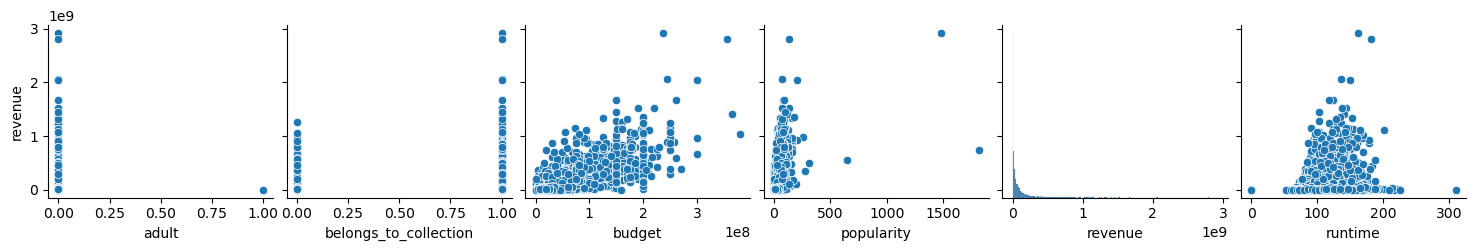

In [185]:
## Plot first 6 features
sns.pairplot(data=df, y_vars='revenue', x_vars=plot_cols[:6])

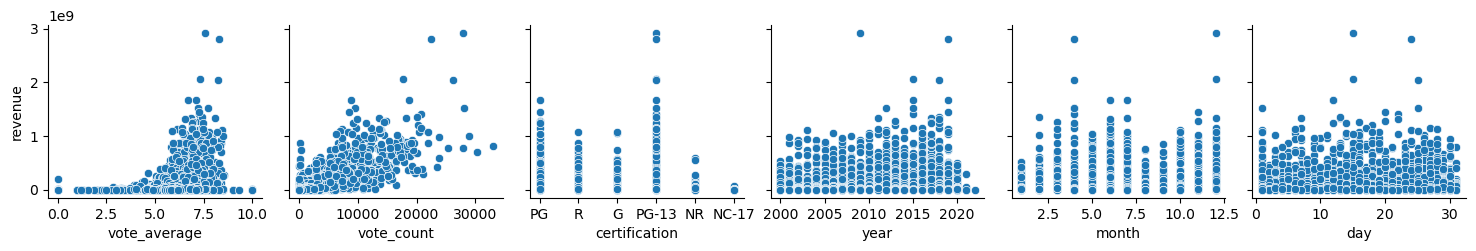

In [187]:
## Plot next 6 features
sns.pairplot(data=df, y_vars='revenue', x_vars=plot_cols[6:12])

##### Observation: 
Check outliers in popularity, runtime

### Functionize ALL of the preprocessing

In [212]:
def get_train_test_split(df_, y_col='revenue',drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    final_drop_cols = []
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse=False))
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )

    preprocessor = make_column_transformer((num_pipe, num_cols),
                                           (cat_pipe,cat_cols),remainder='passthrough')
    
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    ## Finding the categorical pipeline in our col transformer.
    preprocessor.named_transformers_['pipeline-2']

    ## B) Using list-slicing to find the encoder 
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


    ## Create the empty list
    final_features = [*cat_features,*num_cols,*already_ohe_cols]

    ## Make df verisons of x data
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=final_features, index=X_train.index)


    X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                             columns=final_features, index=X_test.index)


    ### Adding a Constant for Statsmodels
    ## Make final X_train_df and X_test_df with constants added
    X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
    X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
    return X_train_df, y_train, X_test_df, y_test

In [203]:
def evaluate_ols(result,X_train_df, y_train, figsize=(12,5), show_summary=True):
    if show_summary==True:
        
        try:
            display(result.summary())
        
        except:
            pass
        
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=figsize)
    
     ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
     ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:56:02   Log-Likelihood:                -76026.
No. Observations:                3854   AIC:                         1.522e+05
Df Residuals:                    3770   BIC:                         1.527e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     6.506e+06   9.05e+07      0.072      0.943   -1.71e+08    1.84e+08
certification_MISSING                  1.8055      0.057     31.726      0.000       1.694       1.917
certification_NC-17                 5.372e+05   3.73e+04     14.405      0.000    4.64e+05     6.1e+05
certification_NR                    2.196e+05   8.15e+04      2.693      0.007    5.97e+04    3.79e+05
certification_PG                    -4.46e+06   1.48e+06     -3.023      0.003   -7.35e+06   -1.57e+06
certification_PG-13                 2.664e+04    659.213     40.418      0.000    2.54e+04    2.79e+04
certification_R                     1.099e+06   2.85e+05      3.849      0.000    5.39e+05    1.66e+06
adult                              -5.594e+05   4.33e+05     -1.293      0.196   -1.41e+06    2.89e+05
budget                               1.88e+05   1.72e+05      1.095      0.273   -1.49e+05    5.25e+05
popularity                          -2.88e+08   7.19e+07     -4.006      0.000   -4.29e+08   -1.47e+08
runtime                            -2.684e+08   7.24e+07     -3.707      0.000    -4.1e+08   -1.26e+08
vote_average                       -2.653e+08   7.77e+07     -3.416      0.001   -4.18e+08   -1.13e+08
vote_count                         -2.724e+08   7.26e+07     -3.755      0.000   -4.15e+08    -1.3e+08
year                               -2.797e+08   7.19e+07     -3.892      0.000   -4.21e+08   -1.39e+08
month                              -2.816e+08   7.17e+07     -3.930      0.000   -4.22e+08   -1.41e+08
day                                -2.974e+08   7.17e+07     -4.149      0.000   -4.38e+08   -1.57e+08
belongs_to_collection               4.707e+07   3.96e+06     11.871      0.000    3.93e+07    5.48e+07
Genre_Drama                         1.798e+05   3.85e+06      0.047      0.963   -7.37e+06    7.73e+06
Genre_Romance                       5.573e+06   4.21e+06      1.325      0.185   -2.67e+06    1.38e+07
Genre_Horror                       -2.449e+06    5.6e+06     -0.437      0.662   -1.34e+07    8.53e+06
Genre_Thriller                      1.684e+05   4.07e+06      0.041      0.967   -7.82e+06    8.15e+06
Genre_Crime                        -6.272e+06    4.6e+06     -1.364      0.173   -1.53e+07    2.74e+06
Genre_Animation                     1.884e+07   7.92e+06      2.378      0.017    3.31e+06    3.44e+07
Genre_Comedy                        6.377e+06   3.82e+06      1.669      0.095   -1.11e+06    1.39e+07
Genre_Family                       -1.008e+07   7.53e+06     -1.340      0.180   -2.48e+07    4.67e+06
Genre_Adventure                     1.004e+07   4.97e+06      2.019      0.044    2.92e+05    1.98e+07
Genre_Action                       -1.182e+07   4.12e+06     -2.868      0.004   -1.99e+07   -3.

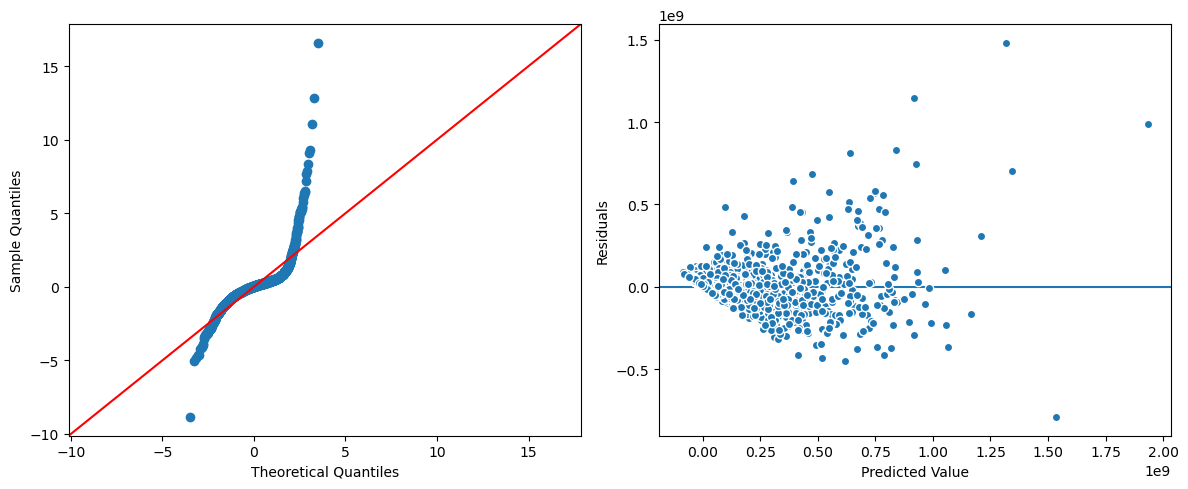

In [213]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)
X_train_df

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result, X_train_df, y_train)

## Observation: 

We are definitely violating the assumptions of normal residuals and homoscedasticity.

## Improving Our Model:

### Removing Outliers

#### Using Z-Score Rule

In [214]:
def find_outliers_Z(data, verbose=True):
	"""Identifies outliers using Z-score > 3 rule.
	Args:
		data (pd.Series): data to check for outliers
		verbose (bool, optional): Print # of outliers in column. Defaults to True.
	Returns:
		Boolean Series: pd.Series with True/False for every value
	"""
	from scipy import stats
	import numpy as np
	outliers = np.abs(stats.zscore(data))>3

	if verbose:
		print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
	return outliers
	

In [215]:
find_outliers_Z(df['runtime'])

- 61 outliers found in runtime using Z-Scores.


imdb_id
tt0118694    False
tt0120467    False
tt0120630    False
tt0120753    False
tt0120755    False
             ...  
tt9735462    False
tt9770150    False
tt9839038    False
tt9877170    False
tt9883996    False
Name: runtime, Length: 5139, dtype: bool

In [216]:
## save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers = {}

for col in outlier_cols:
    col_outliers = find_outliers_Z(df[col])
    
    outliers[col] = col_outliers

- 61 outliers found in runtime using Z-Scores.
- 22 outliers found in popularity using Z-Scores.
- 131 outliers found in revenue using Z-Scores.


In [217]:
# Make new df_clean copy of df
df_clean = df.copy()

## loop through dictionary to remove outliers
for col, col_outliers in outliers.items():
    df_clean  = df_clean.loc[~col_outliers]

In [218]:
df_clean

adult  belongs_to_collection       budget  popularity      revenue  \
imdb_id                                                                         
tt0118694    0.0                  False     150000.0      24.889   12854953.0   
tt0120467    0.0                  False     120000.0       4.182      14904.0   
tt0120630    0.0                   True   45000000.0      46.941  224834564.0   
tt0120753    0.0                  False    8000000.0      14.477     105983.0   
tt0120755    0.0                   True  125000000.0      33.420  546388105.0   
...          ...                    ...          ...         ...          ...   
tt9735462    0.0                  False   25900000.0       7.482   11131254.0   
tt9770150    0.0                  False    5000000.0      24.531   14784114.0   
tt9839038    0.0                   True   20000000.0       4.533    6700000.0   
tt9877170    0.0                  False    7907534.0       5.279   11136444.0   
tt9883996    0.0                  False   20000000.0      10.826    6435260.0   

           runtime  vote_average  vote_count certification  Genre_Drama  ...  \
imdb_id                                                                  ...   
tt0118694     99.0         8.100      2070.0            PG         True  ...   
tt0120467     87.0         5.400        42.0             R         True  ...   
tt0120630     84.0         6.735      4213.0             G        False  ...   
tt0120753    122.0         5.904       260.0             R         True  ...   
tt0120755    123.0         6.109      5581.0         PG-13        False  ...   
...            ...           ...         ...           ...          ...  ...   
tt9735462    126.0         6.800       265.0         PG-13         True  ...   
tt9770150    108.0         7.260      2521.0             R         True  ...   
tt9839038    110.0         6.183        30.0           NaN        False  ...   
tt9877170    135.0         7.200        37.0           NaN         True  ...   
tt9883996    113.0         7.096        89.0           NaN         True  ...   

           ProdComp_Summit Entertainment  ProdComp_TF1 Films Production  \
imdb_id                                                                   
tt0118694                          False                          False   
tt0120467                          False                          False   
tt0120630                          False                          False   
tt0120753                          False                          False   
tt0120755                          False                          False   
...                                  ...                            ...   
tt9735462                          False                          False   
tt9770150                          False                          False   
tt9839038                          False                          False   
tt9877170                          False                          False   
tt9883996                          False                          False   

           ProdComp_TSG Entertainment  ProdComp_The Weinstein Company  \
imdb_id                                                                 
tt0118694                       False                           False   
tt0120467                       False                           False   
tt0120630                       False                           False   
tt0120753                       False                           False   
tt0120755                       False                           False   
...                               ...                             ...   
tt9735462                       False                           False   
tt9770150                       False                           False   
tt9839038                       False                           False   
tt9877170                       False                           False   
tt9883996                       False                           

## Model 2: Outliers Removed (Z_scores)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:09:02   Log-Likelihood:                -71107.
No. Observations:                3707   AIC:                         1.424e+05
Df Residuals:                    3623   BIC:                         1.429e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     -2.26e+06   5.25e+07     -0.043      0.966   -1.05e+08    1.01e+08
certification_MISSING                  1.3060      0.037     34.994      0.000       1.233       1.379
certification_NC-17                 4.631e+05   7.74e+04      5.985      0.000    3.11e+05    6.15e+05
certification_NR                    1.755e+05   5.67e+04      3.094      0.002    6.43e+04    2.87e+05
certification_PG                   -1.184e+06   8.69e+05     -1.362      0.173   -2.89e+06     5.2e+05
certification_PG-13                 1.791e+04    535.860     33.429      0.000    1.69e+04     1.9e+04
certification_R                    -1.156e+05   1.71e+05     -0.676      0.499   -4.51e+05     2.2e+05
adult                              -3.174e+05   2.55e+05     -1.244      0.214   -8.18e+05    1.83e+05
budget                             -6.755e+04   1.02e+05     -0.665      0.506   -2.67e+05    1.32e+05
popularity                          3.203e+07    4.3e+07      0.744      0.457   -5.23e+07    1.16e+08
runtime                             3.096e+07   4.34e+07      0.713      0.476   -5.41e+07    1.16e+08
vote_average                        2.041e+07   4.57e+07      0.447      0.655   -6.92e+07     1.1e+08
vote_count                          2.729e+07   4.34e+07      0.629      0.530   -5.78e+07    1.12e+08
year                                3.471e+07   4.31e+07      0.806      0.420   -4.97e+07    1.19e+08
month                               2.543e+07    4.3e+07      0.592      0.554   -5.88e+07     1.1e+08
day                                 1.399e+07    4.3e+07      0.325      0.745   -7.03e+07    9.83e+07
belongs_to_collection               3.567e+07   2.39e+06     14.929      0.000     3.1e+07    4.04e+07
Genre_Drama                        -2.485e+06   2.28e+06     -1.092      0.275   -6.95e+06    1.98e+06
Genre_Romance                       5.707e+06   2.49e+06      2.291      0.022    8.22e+05    1.06e+07
Genre_Horror                        9.991e+05    3.3e+06      0.303      0.762   -5.47e+06    7.47e+06
Genre_Thriller                      2.527e+06   2.42e+06      1.043      0.297   -2.22e+06    7.28e+06
Genre_Crime                          -5.7e+06   2.71e+06     -2.106      0.035    -1.1e+07   -3.94e+05
Genre_Animation                     1.569e+07    4.9e+06      3.203      0.001    6.09e+06    2.53e+07
Genre_Comedy                        7.217e+06   2.27e+06      3.185      0.001    2.77e+06    1.17e+07
Genre_Family                       -1.253e+06    4.5e+06     -0.279      0.781   -1.01e+07    7.56e+06
Genre_Adventure                    -4.692e+06   2.97e+06     -1.578      0.115   -1.05e+07    1.14e+06
Genre_Action                       -2.498e+06   2.42e+06     -1.031      0.303   -7.25e+06    2.

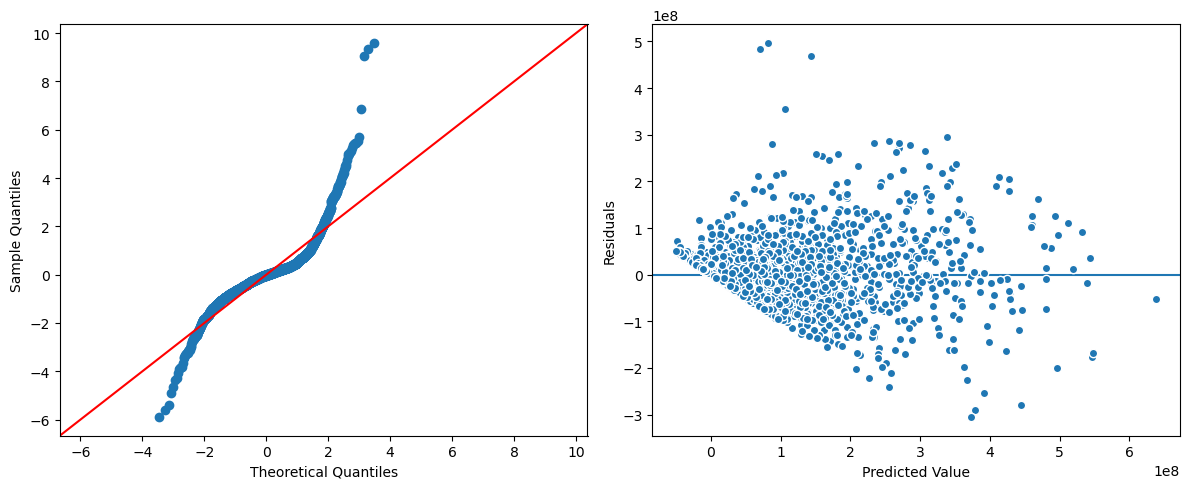

In [219]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean)


## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result, X_train_df, y_train)

### Removing Outliers - Using IQR Rule

<AxesSubplot: xlabel='revenue'>

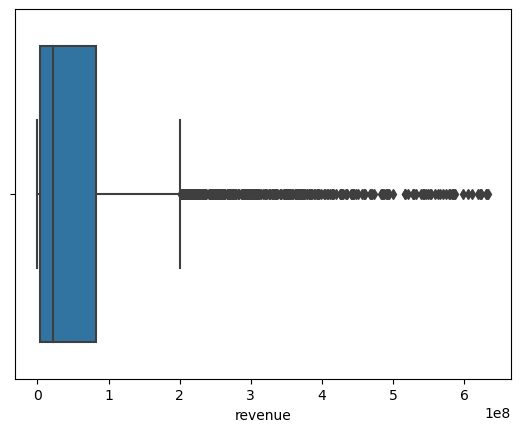

In [220]:
## visualzie outlier-removed target
sns.boxplot(x = y_train)

In [222]:
def find_outliers_IQR(data, verbose=True):
	"""Identifies outliers using IQR Rule. 
	Data that is more than 1.5*IQR less than Q1 or above Q3 is an outlier.
	
	Args:
		data (pd.Series): data to check for outliers
		verbose (bool, optional): Print # of outliers in column. Defaults to True.
	Returns:
		Boolean Series: pd.Series with True/False for every value
	"""
	import numpy as np
	q3 = np.quantile(data,.75)
	q1 = np.quantile(data,.25)

	IQR = q3 - q1
	upper_threshold = q3 + 1.5*IQR
	lower_threshold = q1 - 1.5*IQR

	outliers = (data<lower_threshold) | (data>upper_threshold)
	if verbose:
		print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
		
	return outliers

In [223]:

outliers_z = find_outliers_Z(df['revenue'])
outliers_iqr = find_outliers_IQR(df['revenue'])

- 131 outliers found in revenue using Z-Scores.
- 547 outliers found in revenue using IQR.


In [224]:
## Loop to remove outliers from same clumns using new function
outlier_cols = ['runtime','popularity','revenue']

## Empty dict for both types of outliers
## save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers_z = {}
outliers_IQR = {}

for col in outlier_cols:
    col_outliers_z = find_outliers_Z(df[col])
    outliers_z[col] = col_outliers_z
    
    col_outliers_iqr = find_outliers_IQR(df[col])
    outliers_IQR[col] = col_outliers_iqr
    print()
## Use both functions to see the comparison for # of outliers

- 61 outliers found in runtime using Z-Scores.
- 162 outliers found in runtime using IQR.

- 22 outliers found in popularity using Z-Scores.
- 419 outliers found in popularity using IQR.

- 131 outliers found in revenue using Z-Scores.
- 547 outliers found in revenue using IQR.



In [225]:
# Make new df_clean copy of df
df_clean_iqr = df.copy()

## loop through dictionary to remove outliers
for col, col_outliers in outliers_IQR.items():
    df_clean_iqr  = df_clean_iqr.loc[~col_outliers]
df_clean_iqr

adult  belongs_to_collection      budget  popularity     revenue  \
imdb_id                                                                       
tt0118694    0.0                  False    150000.0      24.889  12854953.0   
tt0120467    0.0                  False    120000.0       4.182     14904.0   
tt0120753    0.0                  False   8000000.0      14.477    105983.0   
tt0120913    0.0                  False  75000000.0      18.185  36754634.0   
tt0122459    0.0                  False  24000000.0      13.069  36609995.0   
...          ...                    ...         ...         ...         ...   
tt9735462    0.0                  False  25900000.0       7.482  11131254.0   
tt9770150    0.0                  False   5000000.0      24.531  14784114.0   
tt9839038    0.0                   True  20000000.0       4.533   6700000.0   
tt9877170    0.0                  False   7907534.0       5.279  11136444.0   
tt9883996    0.0                  False  20000000.0      10.826   6435260.0   

           runtime  vote_average  vote_count certification  Genre_Drama  ...  \
imdb_id                                                                  ...   
tt0118694     99.0         8.100      2070.0            PG         True  ...   
tt0120467     87.0         5.400        42.0             R         True  ...   
tt0120753    122.0         5.904       260.0             R         True  ...   
tt0120913     94.0         6.609       915.0            PG        False  ...   
tt0122459    115.0         6.595       362.0            PG        False  ...   
...            ...           ...         ...           ...          ...  ...   
tt9735462    126.0         6.800       265.0         PG-13         True  ...   
tt9770150    108.0         7.260      2521.0             R         True  ...   
tt9839038    110.0         6.183        30.0           NaN        False  ...   
tt9877170    135.0         7.200        37.0           NaN         True  ...   
tt9883996    113.0         7.096        89.0           NaN         True  ...   

           ProdComp_Summit Entertainment  ProdComp_TF1 Films Production  \
imdb_id                                                                   
tt0118694                          False                          False   
tt0120467                          False                          False   
tt0120753                          False                          False   
tt0120913                          False                          False   
tt0122459                          False                          False   
...                                  ...                            ...   
tt9735462                          False                          False   
tt9770150                          False                          False   
tt9839038                          False                          False   
tt9877170                          False                          False   
tt9883996                          False                          False   

           ProdComp_TSG Entertainment  ProdComp_The Weinstein Company  \
imdb_id                                                                 
tt0118694                       False                           False   
tt0120467                       False                           False   
tt0120753                       False                           False   
tt0120913                       False                           False   
tt0122459                       False                           False   
...                               ...                             ...   
tt9735462                       False                           False   
tt9770150                       False                           False   
tt9839038                       False                           False   
tt9877170                       False                           False   
tt9883996                       False                           False   

           ProdC

### Model 3 - IQR Outliers Removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     73.89
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:14:16   Log-Likelihood:                -60115.
No. Observations:                3230   AIC:                         1.204e+05
Df Residuals:                    3146   BIC:                         1.209e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                    -9.046e+06   2.98e+07     -0.304      0.761   -6.74e+07    4.93e+07
certification_MISSING                  0.8032      0.030     26.977      0.000       0.745       0.862
certification_NC-17                  6.24e+05   7.63e+04      8.182      0.000    4.74e+05    7.74e+05
certification_NR                    1.411e+05   3.66e+04      3.859      0.000    6.94e+04    2.13e+05
certification_PG                    2.311e+05   5.01e+05      0.462      0.644   -7.51e+05    1.21e+06
certification_PG-13                 1.278e+04    481.429     26.554      0.000    1.18e+04    1.37e+04
certification_R                    -4.459e+05   1.05e+05     -4.248      0.000   -6.52e+05    -2.4e+05
adult                              -4.601e+04   1.54e+05     -0.299      0.765   -3.47e+05    2.55e+05
budget                             -4.528e+04   6.13e+04     -0.738      0.460   -1.66e+05     7.5e+04
popularity                          1.221e+08   2.64e+07      4.622      0.000    7.03e+07    1.74e+08
runtime                             1.091e+08   2.66e+07      4.099      0.000    5.69e+07    1.61e+08
vote_average                        1.026e+08   2.77e+07      3.708      0.000    4.83e+07    1.57e+08
vote_count                          1.057e+08   2.66e+07      3.968      0.000    5.34e+07    1.58e+08
year                                1.144e+08   2.65e+07      4.318      0.000    6.25e+07    1.66e+08
month                               1.143e+08   2.64e+07      4.336      0.000    6.26e+07    1.66e+08
day                                 1.009e+08   2.64e+07      3.829      0.000    4.93e+07    1.53e+08
belongs_to_collection                1.78e+07   1.53e+06     11.648      0.000    1.48e+07    2.08e+07
Genre_Drama                        -5.195e+06   1.37e+06     -3.805      0.000   -7.87e+06   -2.52e+06
Genre_Romance                       2.919e+06    1.5e+06      1.950      0.051    -1.6e+04    5.85e+06
Genre_Horror                        1.176e+06   1.98e+06      0.595      0.552    -2.7e+06    5.05e+06
Genre_Thriller                      6.228e+05   1.48e+06      0.422      0.673   -2.27e+06    3.52e+06
Genre_Crime                        -1.591e+06   1.64e+06     -0.968      0.333   -4.81e+06    1.63e+06
Genre_Animation                    -2.378e+05   3.05e+06     -0.078      0.938   -6.22e+06    5.74e+06
Genre_Comedy                        6.669e+06   1.39e+06      4.801      0.000    3.95e+06    9.39e+06
Genre_Family                        4.015e+06   2.69e+06      1.491      0.136   -1.27e+06     9.3e+06
Genre_Adventure                    -3.024e+06   1.88e+06     -1.612      0.107    -6.7e+06    6.53e+05
Genre_Action                       -3.011e+06   1.48e+06     -2.031      0.042   -5.92e+06   -1.

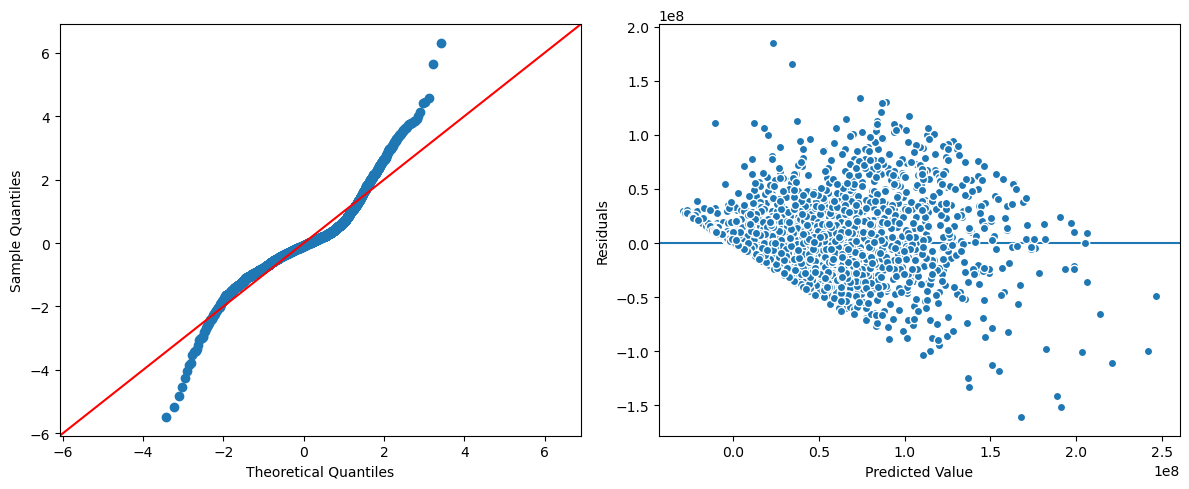

In [226]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean_iqr)
X_train_df

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result, X_train_df, y_train)

### Observation:
Linearity is better than model 1 ! But R score is low tha model 1.  Let's check pvalues

## model 4 - Remove Columns with Insignificant P-Values

In [246]:
## get pvalues from model result
pvalues =result.pvalues
pvalues

certification_G                        7.612651e-01
certification_MISSING                 2.295911e-144
certification_NC-17                    3.997673e-16
certification_NR                       1.161891e-04
certification_PG                       6.444677e-01
                                          ...      
ProdComp_Village Roadshow Pictures     4.333858e-01
ProdComp_Walt Disney Pictures          1.545703e-01
ProdComp_Warner Bros. Pictures         2.232777e-01
ProdComp_Working Title Films           7.553083e-01
const                                  3.143354e-05
Length: 86, dtype: float64

In [247]:
## Check for p-values that are >.05
pvalues[pvalues>.05]

certification_G                       0.761265
certification_PG                      0.644468
adult                                 0.764634
budget                                0.460452
Genre_Romance                         0.051259
Genre_Horror                          0.551985
Genre_Thriller                        0.673248
Genre_Crime                           0.332966
Genre_Animation                       0.937889
Genre_Family                          0.136120
Genre_Adventure                       0.106978
Genre_Mystery                         0.076490
Genre_War                             0.741338
Genre_History                         0.484954
Genre_Music                           0.335612
Genre_Documentary                     0.941035
ProdComp_20th Century Fox             0.134192
ProdComp_Amblin Entertainment         0.406957
ProdComp_BBC Film                     0.772521
ProdComp_Canal+                       0.817019
ProdComp_Ciné+                        0.673356
ProdComp_Drea

## Removing features - based on p-values

In [248]:
## Get list of ALL genre columns to see how many are sig
genre_cols

['Genre_Drama',
 'Genre_Romance',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_Crime',
 'Genre_Animation',
 'Genre_Comedy',
 'Genre_Family',
 'Genre_Adventure',
 'Genre_Action',
 'Genre_Science Fiction',
 'Genre_Fantasy',
 'Genre_Mystery',
 'Genre_War',
 'Genre_History',
 'Genre_Music',
 'Genre_Western',
 'Genre_Documentary']

In [249]:
## save just genre pvalues
genre_pvals = pvalues[genre_cols]
genre_pvals

Genre_Drama              1.444675e-04
Genre_Romance            5.125852e-02
Genre_Horror             5.519852e-01
Genre_Thriller           6.732485e-01
Genre_Crime              3.329665e-01
Genre_Animation          9.378887e-01
Genre_Comedy             1.651106e-06
Genre_Family             1.361201e-01
Genre_Adventure          1.069780e-01
Genre_Action             4.237420e-02
Genre_Science Fiction    1.697087e-15
Genre_Fantasy            1.925137e-04
Genre_Mystery            7.649042e-02
Genre_War                7.413381e-01
Genre_History            4.849537e-01
Genre_Music              3.356117e-01
Genre_Western            5.929681e-03
Genre_Documentary        9.410353e-01
dtype: float64

In [250]:
# len(comp_pvals>.05)/len(comp_pvals)
print('% of Good P-Values')
(genre_pvals<.05).value_counts(normalize=True)*100

% of Good P-Values


False    66.666667
True     33.333333
dtype: float64

In [ ]:
## Get list of ALL ProdComp columns to see how many are sig

In [251]:
comp_cols = [c for c in df_clean_iqr if c.startswith('ProdComp')]

In [252]:
comp_cols

['ProdComp_20th Century Fox',
 'ProdComp_Amblin Entertainment',
 'ProdComp_BBC Film',
 'ProdComp_Blumhouse Productions',
 'ProdComp_Canal+',
 'ProdComp_Ciné+',
 'ProdComp_Columbia Pictures',
 'ProdComp_DreamWorks Pictures',
 'ProdComp_Dune Entertainment',
 'ProdComp_EuropaCorp',
 'ProdComp_Film i Väst',
 'ProdComp_Film4 Productions',
 'ProdComp_FilmNation Entertainment',
 'ProdComp_Focus Features',
 'ProdComp_Fox 2000 Pictures',
 'ProdComp_Fox Searchlight Pictures',
 'ProdComp_France 2 Cinéma',
 'ProdComp_France 3 Cinéma',
 'ProdComp_IM Global',
 'ProdComp_Ingenious Media',
 'ProdComp_Legendary Pictures',
 'ProdComp_Lionsgate',
 'ProdComp_MISSING',
 'ProdComp_Metro-Goldwyn-Mayer',
 'ProdComp_Millennium Films',
 'ProdComp_New Line Cinema',
 'ProdComp_New Regency Pictures',
 'ProdComp_Original Film',
 'ProdComp_Paramount',
 'ProdComp_Participant',
 'ProdComp_Pathé',
 'ProdComp_RatPac Entertainment',
 'ProdComp_Regency Enterprises',
 'ProdComp_Relativity Media',
 'ProdComp_Reliance Entert

In [253]:
## Get list of ALL prod_comp columns to see how many are sig
comp_pvals = pvalues[comp_cols]
comp_pvals

ProdComp_20th Century Fox             0.134192
ProdComp_Amblin Entertainment         0.406957
ProdComp_BBC Film                     0.772521
ProdComp_Blumhouse Productions        0.000090
ProdComp_Canal+                       0.817019
ProdComp_Ciné+                        0.673356
ProdComp_Columbia Pictures            0.042159
ProdComp_DreamWorks Pictures          0.668495
ProdComp_Dune Entertainment           0.001228
ProdComp_EuropaCorp                   0.093255
ProdComp_Film i Väst                  0.448165
ProdComp_Film4 Productions            0.612490
ProdComp_FilmNation Entertainment     0.002056
ProdComp_Focus Features               0.643180
ProdComp_Fox 2000 Pictures            0.377466
ProdComp_Fox Searchlight Pictures     0.802575
ProdComp_France 2 Cinéma              0.044563
ProdComp_France 3 Cinéma              0.280123
ProdComp_IM Global                    0.005588
ProdComp_Ingenious Media              0.779063
ProdComp_Legendary Pictures           0.911390
ProdComp_Lion

In [254]:
# len(comp_pvals>.05)/len(comp_pvals)
print('% of Good P-Values')
(comp_pvals<.05).value_counts(normalize=True)*100

% of Good P-Values


False    78.0
True     22.0
dtype: float64

### Observation: 
Both have <50% bad pvalues. Keep both

## 2 - Addressing Multicollinearity

In [229]:
## Calc abs values of correlations
corr = df.corr().abs()
corr

C:\Users\esnak\AppData\Local\Temp\ipykernel_23496\2696322970.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


adult  belongs_to_collection    budget  \
adult                               1.000000               0.007381  0.010190   
belongs_to_collection               0.007381               1.000000  0.282645   
budget                              0.010190               0.282645  1.000000   
popularity                          0.002086               0.231722  0.391226   
revenue                             0.006773               0.391838  0.767430   
...                                      ...                    ...       ...   
ProdComp_Universal Pictures         0.002627               0.078959  0.079731   
ProdComp_Village Roadshow Pictures  0.001411               0.012354  0.099434   
ProdComp_Walt Disney Pictures       0.001628               0.060975  0.256117   
ProdComp_Warner Bros. Pictures      0.002386               0.022856  0.179264   
ProdComp_Working Title Films        0.001122               0.007176  0.004673   

                                    popularity   revenue   runtime  \
adult                                 0.002086  0.006773  0.015353   
belongs_to_collection                 0.231722  0.391838  0.011710   
budget                                0.391226  0.767430  0.203398   
popularity                            1.000000  0.506784  0.088962   
revenue                               0.506784  1.000000  0.199409   
...                                        ...       ...       ...   
ProdComp_Universal Pictures           0.050287  0.104368  0.000101   
ProdComp_Village Roadshow Pictures    0.045561  0.054870  0.011508   
ProdComp_Walt Disney Pictures         0.072431  0.217963  0.002509   
ProdComp_Warner Bros. Pictures        0.073898  0.132653  0.051013   
ProdComp_Working Title Films          0.006987  0.006390  0.017459   

                                    vote_average  vote_count  Genre_Drama  \
adult                                   0.014873    0.008085     0.014041   
belongs_to_collection                   0.044714    0.311124     0.281872   
budget                                  0.131568    0.644296     0.246550   
popularity                              0.167757    0.473766     0.135856   
revenue                                 0.206672    0.788743     0.211120   
...                                          ...         ...          ...   
ProdComp_Universal Pictures             0.022882    0.096897     0.077970   
ProdComp_Village Roadshow Pictures      0.018559    0.082481     0.026572   
ProdComp_Walt Disney Pictures           0.048930    0.129010     0.078716   
ProdComp_Warner Bros. Pictures          0.040521    0.164474     0.019985   
ProdComp_Working Title Films            0.026484    0.034750     0.017570   

                                    Genre_Romance  ...  \
adult                                    0.006622  ...   
belongs_to_collection                    0.122351  ...   
budget                                   0.113228  ...   
popularity                               0.065011  ...   
revenue                                  0.074433  ...   
...                                           ...  ...   
ProdComp_Universal Pictures              0.001006  ...   
ProdComp_Village Roadshow Pictures       0.007841  ...   
ProdComp_Walt Disney Pictures            0.024826  ...   
ProdComp_Warner Bros. Pictures           0.032796  ...   
ProdComp_Working Title Films             0.024725  ...   

                                    ProdComp_Summit Entertainment  \
adult                                                    0.001411   
belongs_to_collection                                    0.040575   
budget                                                   0.049348   
popularity                                               0.040436   
revenue                                                  0.035240   
...                                                           ...   
ProdComp_Universal Pictures                              0.008348   
ProdComp_Village Roadshow Pictures                 

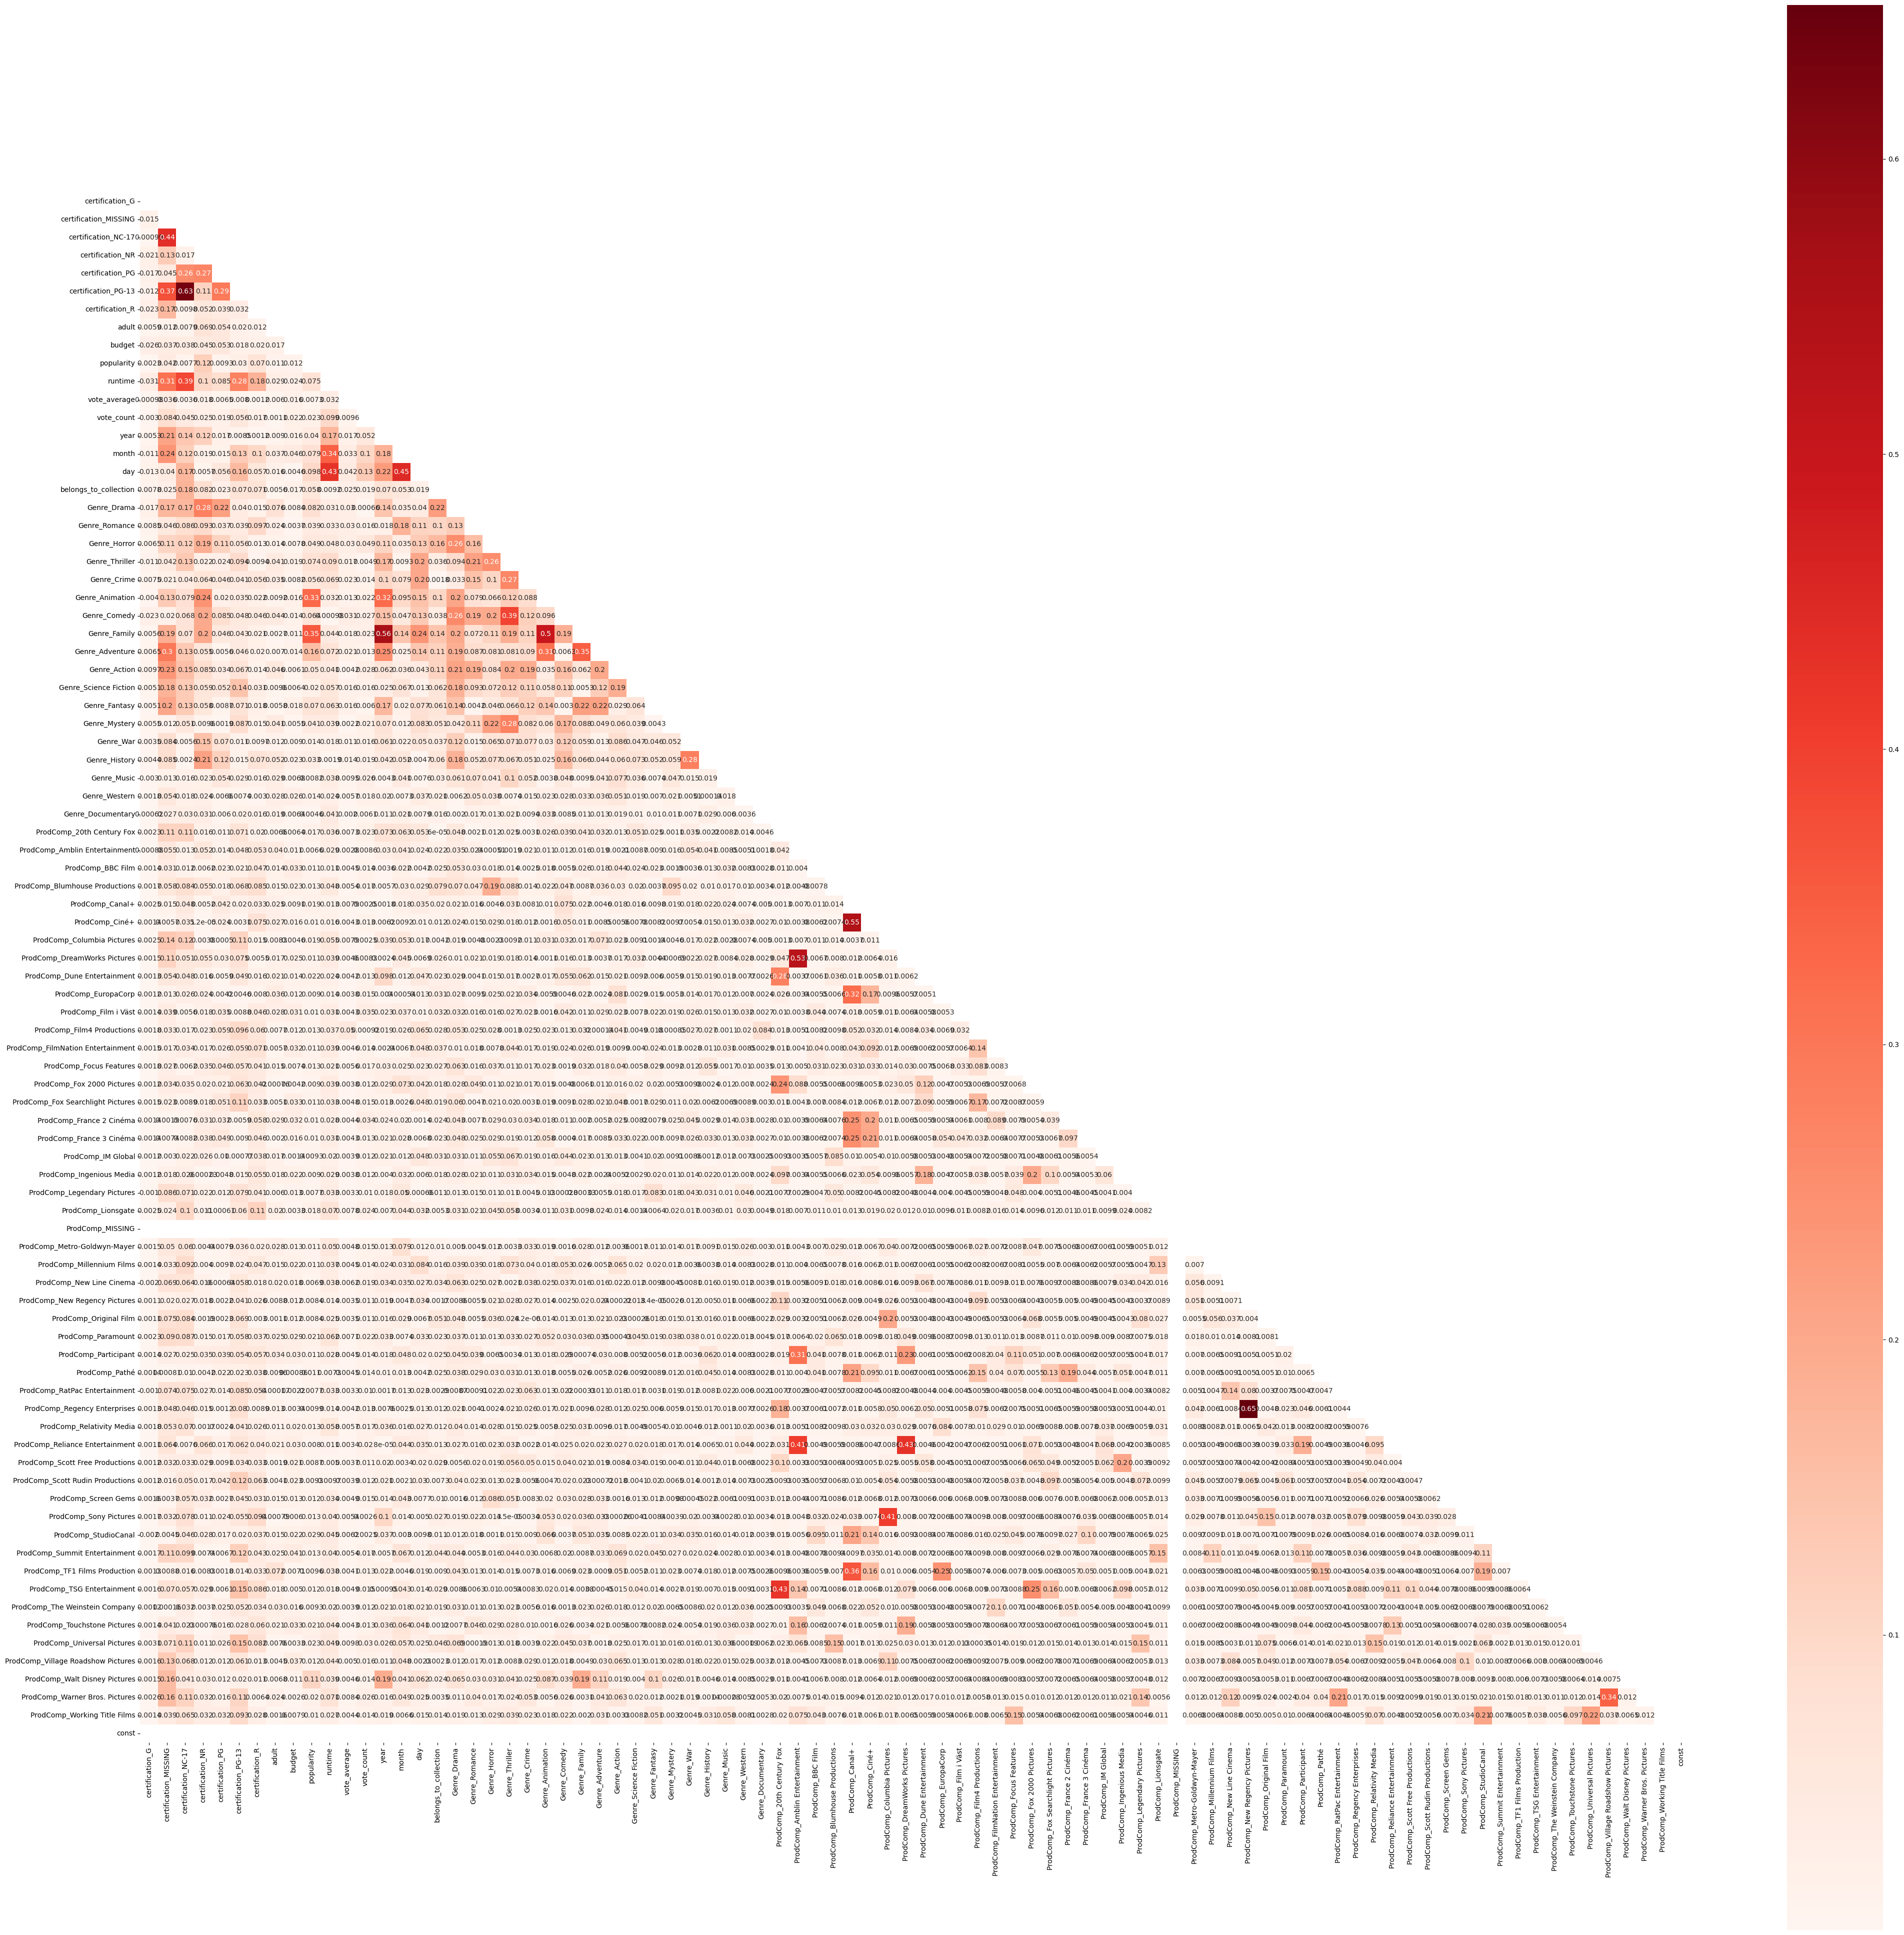

In [228]:
## Calculating the mask to hide the upper-right of the triangle
corr = X_train_df.corr().abs()

mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(50,50))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

### Observation: 

Looking at the correlation heatmap above, there is no  correlation that is greater than 0.7. So it is ok. 

In [270]:
def savefig(fname,fig=None, ax=None,dpi=300,bbox_inches='tight',
            facecolor='auto' ,verbose=True):
	"""Saves matplotlib fig using either fig or ax for plot to save.
	Args:
		fname (str): image filename (ending with extension  (e.g. .png))
		fig (matplotlib Figure, optional): figure object to save. Defaults to None.
		ax (mayplotlib Axes), optional): ax of of figure object to save. Defaults to None.
		dpi (int, optional): pixel density. Defaults to 300.
		bbox_inches (str, optional): corrects cutoff labels. Defaults to 'tight'.
		facecolor (str, optional): control figure facecolor. Defaults to 'auto'.
		verbose (bool, optional): Print filepath of saved iamge. Defaults to True.
	Raises:
		Exception: If BOTH fig and ax are passed OR neither fig or ax are passed.
	"""
	if ((fig==None) & (ax==None)) |((fig!=None) & (ax!=None)) :
		raise Exception("Must provide EITHER fig or AX")
		
	if fig is None:
		fig = ax.get_figure()

	fig.savefig(fname,dpi=dpi,bbox_inches=bbox_inches,facecolor=facecolor )
	if verbose:
		print(f'- Figure saved as {fname}')

In [271]:
# create a new folder
FOLDER = "Image/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

[]

### Variance Inflation Factor

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

certification_G  certification_MISSING  certification_NC-17  \
imdb_id                                                                  
tt1190617         -0.00031          -1.230659e+06            -7.084582   
tt3300980         -0.00031          -1.342435e+07             3.100418   
tt1045778         -0.00031           3.876934e+07             5.584418   
tt0429591         -0.00031          -9.230659e+06             7.331418   
tt8589358         -0.00031          -2.122066e+07           -15.021582   
...                    ...                    ...                  ...   
tt0475179         -0.00031          -2.016066e+07           -13.206582   
tt6278008         -0.00031          -1.481883e+07           -10.588582   
tt1038988         -0.00031          -1.973066e+07            18.581418   
tt2172071         -0.00031          -1.283874e+07            -7.458582   
tt1182924         -0.00031           8.769341e+06           -12.181582   

           certification_NR  certification_PG  certification_PG-13  \
imdb_id                                                              
tt1190617        -23.590402         -1.756019         -1082.172136   
tt3300980         29.409598          1.111981          -729.172136   
tt1045778         -9.590402         -1.264019           475.827864   
tt0429591         -2.590402          0.168981           147.827864   
tt8589358        -16.590402          0.311981         -1154.172136   
...                     ...               ...                  ...   
tt0475179         17.409598          1.911981         -1143.172136   
tt6278008         25.409598          0.511981         -1112.172136   
tt1038988        -28.590402          0.979981          2545.827864   
tt2172071         39.409598         -0.367019         -1021.172136   
tt1182924        -20.590402         -1.177019         -1108.172136   

           certification_R     adult     budget  popularity  ...  \
imdb_id                                                      ...   
tt1190617        -2.279156  3.171836 -12.330025   -0.017028  ...   
tt3300980         6.720844  5.171836   9.669975   -0.017028  ...   
tt1045778        -1.279156 -0.828164   2.669975   -0.017028  ...   
tt0429591        -4.279156 -3.828164 -12.330025   -0.017028  ...   
tt8589358         6.720844  2.171836  -6.330025   -0.017028  ...   
...                    ...       ...        ...         ...  ...   
tt0475179        -4.279156 -5.828164  10.669975   -0.017028  ...   
tt6278008         5.720844  5.171836   5.669975   -0.017028  ...   
tt1038988        -3.279156  4.171836   7.669975   -0.017028  ...   
tt2172071         1.720844  3.171836   3.669975   -0.017028  ...   
tt1182924        -2.279156 -5.828164 -14.330025   -0.017028  ...   

           ProdComp_TF1 Films Production  ProdComp_TSG Entertainment  \
imdb_id                                                                
tt1190617                      -0.005263                    -0.00774   
tt3300980                      -0.005263                    -0.00774   
tt1045778                      -0.005263                    -0.00774   
tt0429591                      -0.005263                    -0.00774   
tt8589358                      -0.005263                    -0.00774   
...                                  ...                         ...   
tt0475179                      -0.005263                    -0.00774   
tt6278008                      -0.005263                    -0.00774   
tt1038988                      -0.005263                    -0.00774   
tt2172071                      -0.005263                    -0.00774   
tt1182924                      -0.005263                    -0.00774   

           ProdComp_The Weinstein Company  ProdComp_Touchstone Pictures  \
imdb_id                                                                   
tt1190617                       -0.004954                     -0.005882   
tt3300980                       -0.004954                     -0.005882   
tt1045778      

In [232]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new dataframe to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

C:\Users\esnak\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\esnak\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


certification_G                       1.006294
certification_MISSING                 1.973667
certification_NC-17                   2.275767
certification_NR                      1.430985
certification_PG                      1.315425
                                        ...   
ProdComp_Village Roadshow Pictures    1.190861
ProdComp_Walt Disney Pictures         1.093428
ProdComp_Warner Bros. Pictures        1.274824
ProdComp_Working Title Films          1.179678
const                                      NaN
Length: 86, dtype: float64

Text(0.5, 1.0, 'OLS Coefficients')

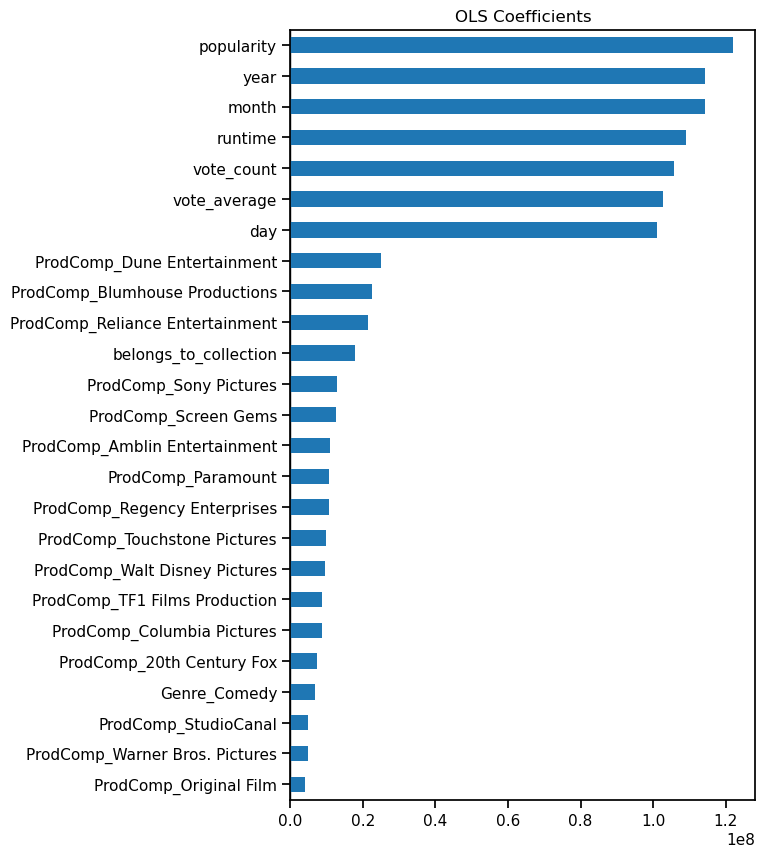

In [269]:
ax = result.params.drop('const').sort_values().tail(25).plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k',lw=1,zorder=0)
ax.set_title('OLS Coefficients')


In [259]:
## Visualize Coefficients
sns.set_context('notebook')
plot_coeffs = pd.DataFrame({'Feature':result.params.index,
                          'Coeff':result.params})
plot_coeffs

Feature  \
certification_G                                        certification_G   
certification_MISSING                            certification_MISSING   
certification_NC-17                                certification_NC-17   
certification_NR                                      certification_NR   
certification_PG                                      certification_PG   
...                                                                ...   
ProdComp_Village Roadshow Pictures  ProdComp_Village Roadshow Pictures   
ProdComp_Walt Disney Pictures            ProdComp_Walt Disney Pictures   
ProdComp_Warner Bros. Pictures          ProdComp_Warner Bros. Pictures   
ProdComp_Working Title Films              ProdComp_Working Title Films   
const                                                            const   

                                           Coeff  
certification_G                    -9.045861e+06  
certification_MISSING               8.031729e-01  
certification_NC-17                 6.240086e+05  
certification_NR                    1.411484e+05  
certification_PG                    2.311484e+05  
...                                          ...  
ProdComp_Village Roadshow Pictures -4.995862e+06  
ProdComp_Walt Disney Pictures       9.451874e+06  
ProdComp_Warner Bros. Pictures      4.897462e+06  
ProdComp_Working Title Films        2.253115e+06  
const                               7.691070e+08  

[86 rows x 2 columns]

In [262]:
top10 = plot_coeffs.sort_values('Coeff',ascending=False).head(10)
top10

Feature         Coeff
popularity                                            popularity  1.220597e+08
year                                                        year  1.144250e+08
month                                                      month  1.143001e+08
runtime                                                  runtime  1.091288e+08
vote_count                                            vote_count  1.056593e+08
vote_average                                        vote_average  1.025884e+08
day                                                          day  1.009458e+08
ProdComp_Dune Entertainment          ProdComp_Dune Entertainment  2.487541e+07
ProdComp_Blumhouse Productions    ProdComp_Blumhouse Productions  2.253709e+07
ProdComp_Reliance Entertainment  ProdComp_Reliance Entertainment  2.129892e+07

C:\Users\esnak\AppData\Local\Temp\ipykernel_23496\1414747905.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


- Figure saved as Image/coeffs.png


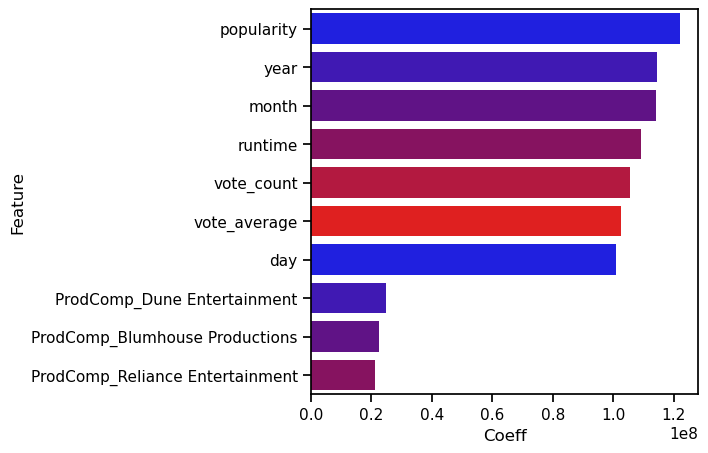

In [273]:
palette = sns.blend_palette(['blue', 'red'])
plt.figure(figsize=(5,5))

sns.barplot(data=top10, y="Feature", x="Coeff", palette= palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
# ax = result.params.sort_values().plot(kind='barh',figsize=(6,12))
ax.axhline(color='black')
savefig('Image/coeffs.png',ax=ax,facecolor='white')

# Compare to Random Forest

In [274]:
from sklearn.ensemble import RandomForestRegressor
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_df, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


RandomForestRegressor(random_state=42, verbose=1)

In [275]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = reg.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = reg.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.973
Testing R^2: 0.806


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


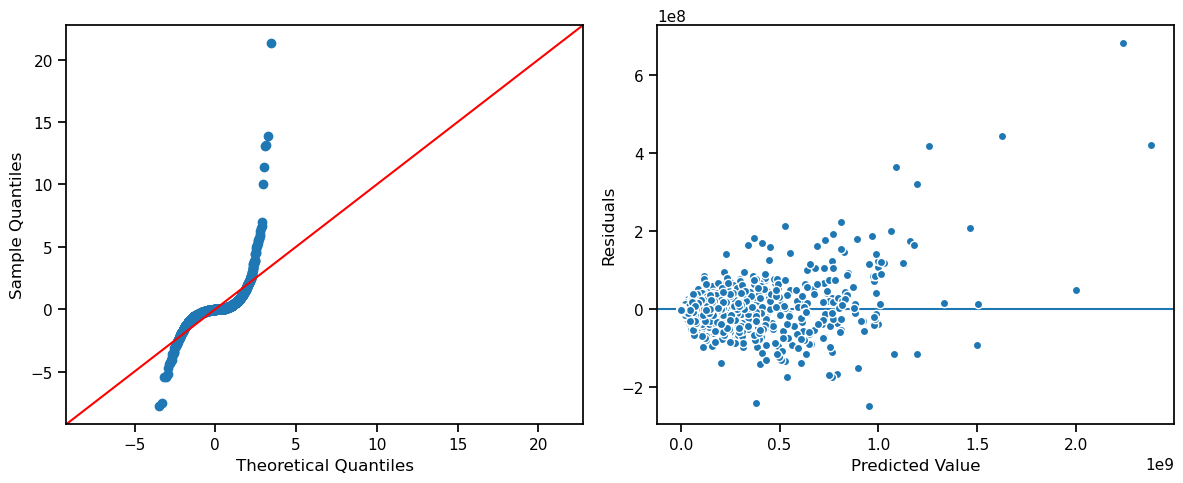

In [276]:
evaluate_ols(reg, X_train_df, y_train)

- Figure saved as Image/rf_importance.png


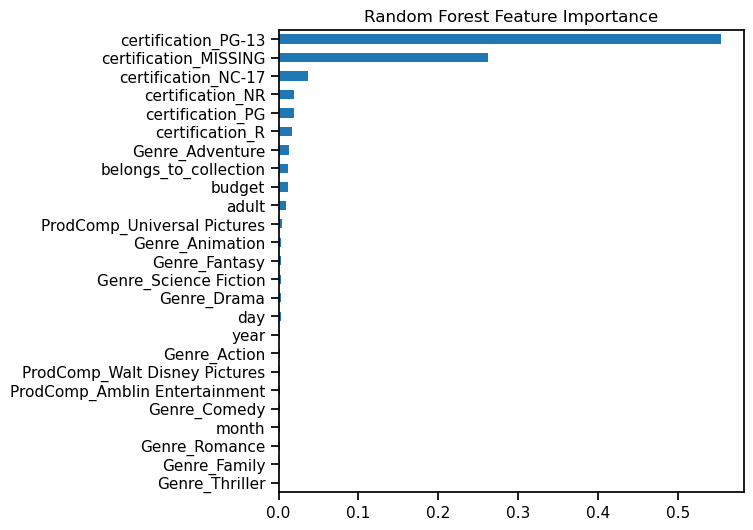

In [280]:
importances = pd.Series(reg.feature_importances_, index=X_train_df.columns)
ax = importances.sort_values().tail(25).plot(kind='barh',figsize=(6,6))
ax.set_title('Random Forest Feature Importance')
savefig('Image/rf_importance.png',ax=ax, facecolor='white')

## Explain Radom Forest model with SHAP


https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html



SHAP (SHapley Additive exPlanations))
- [Repository](https://github.com/slundberg/shap)
- [Documentation](https://shap.readthedocs.io/en/latest/?badge=latest)
    - Install via pip or conda.


SHAP uses game theory to calcualte Shapely values for each feature in the dataset.
Shapely values are calculated by iteratively testing each feature's contribution to the model by comparing the model's performance with vs. without the feature. (The "marginal contribution" of the feature to the model's performance).

https://shap.readthedocs.io/en/latest/genomic_examples.html

### Reduce sample size
Create an X_shap and y_shap variable from your training data

In [294]:
import shap
shap.initjs()
X_shap = shap.sample(X_test_df,nsamples=500,random_state=321)
X_shap

certification_G  certification_MISSING  certification_NC-17  \
imdb_id                                                                  
tt2980554              0.0                 8245.0                7.971   
tt0413895              0.0             85000000.0               19.435   
tt9063902              0.0              1450000.0                8.448   
tt6003368              0.0             22000000.0               24.803   
tt1083452              0.0             23000000.0               15.467   
...                    ...                    ...                  ...   
tt0481499              0.0            135000000.0               59.603   
tt2870756              0.0             16800000.0               14.641   
tt3920820              0.0             10000000.0               43.672   
tt0399327              0.0             33000000.0               10.148   
tt0780521              0.0            105000000.0              131.287   

           certification_NR  certification_PG  certification_PG-13  \
imdb_id                                                              
tt2980554              86.0             5.900                133.0   
tt0413895              97.0             6.209               1215.0   
tt9063902             101.0             7.487                300.0   
tt6003368              91.0             5.296                387.0   
tt1083452             106.0             7.200               1894.0   
...                     ...               ...                  ...   
tt0481499              98.0             6.915               6289.0   
tt2870756              98.0             6.487               1890.0   
tt3920820              99.0             7.287                171.0   
tt0399327              83.0             5.719                466.0   
tt0780521              98.0             7.166               4714.0   

           certification_R  adult  budget  popularity  ...  \
imdb_id                                                ...   
tt2980554           2015.0    6.0    13.0         0.0  ...   
tt0413895           2006.0   12.0     7.0         1.0  ...   
tt9063902           2019.0    9.0     6.0         0.0  ...   
tt6003368           2017.0    5.0    19.0         0.0  ...   
tt1083452           2016.0    2.0    25.0         0.0  ...   
...                    ...    ...     ...         ...  ...   
tt0481499           2013.0    3.0    15.0         0.0  ...   
tt2870756           2014.0    7.0    25.0         0.0  ...   
tt3920820           2019.0    8.0     9.0         0.0  ...   
tt0399327           2005.0    9.0     8.0         0.0  ...   
tt0780521           2009.0   12.0     8.0         1.0  ...   

           ProdComp_TF1 Films Production  ProdComp_TSG Entertainment  \
imdb_id                                                                
tt2980554                            0.0                         0.0   
tt0413895                            0.0                         0.0   
tt9063902                            0.0                         0.0   
tt6003368                            0.0                         1.0   
tt1083452                            0.0                         0.0   
...                                  ...                         ...   
tt0481499                            0.0                         0.0   
tt2870756                            0.0                         0.0   
tt3920820                            0.0                         0.0   
tt0399327                            0.0                         0.0   
tt0780521                            0.0                         0.0   

           ProdComp_The Weinstein Company  ProdComp_Touchstone Pictures  \
imdb_id                                                                   
tt2980554                             0.0                           0.0   
tt0413895                             0.0                           0.0   
tt9063902                             0.0                           0.0   
tt6003368         

In [295]:
## get the corresponding y-values
y_shap = y_test.loc[X_shap.index]
y_shap 

imdb_id
tt2980554        81379.0
tt0413895    144000000.0
tt9063902       368430.0
tt6003368     40120144.0
tt1083452     46152411.0
                ...     
tt0481499    587204668.0
tt2870756     51029361.0
tt3920820      4300000.0
tt0399327     13485145.0
tt0780521    270997378.0
Name: revenue, Length: 500, dtype: float64

In [296]:
# Create a SHAP explainer using your fit model
explainer = shap.Explainer(reg)
explainer

The explainer will use a copy of our model to iterate through all of the features to calculate the marginal contribution of each feature to the model's predictions.

These contributions will be represented as SHAP values, which we will interpret to explain our model.

In [297]:
# Get SHAP values from explainer for your training data
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [298]:
# check X_shape
X_shap.shape

(500, 86)

### Create a summary plot - with plot_type='bar':

- Figure saved as Image/rf_importance.png


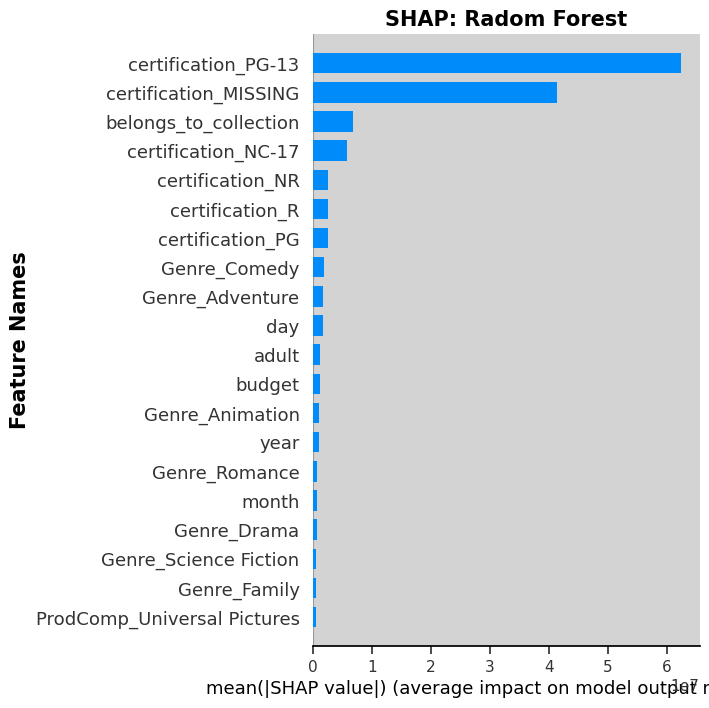

In [299]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type='bar', plot_size=(7,7), show=False)
ax.set_title('SHAP: Radom Forest', fontsize = 15, weight = 'bold')
ax.set_ylabel('Feature Names', fontsize = 15, fontweight='bold')
ax.set_facecolor("lightgray")
savefig('Image/rf_importance.png',ax=ax, facecolor='white')

### Create a summary plot - with plot_type='dot'

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


- Figure saved as Image/rf_importance.png


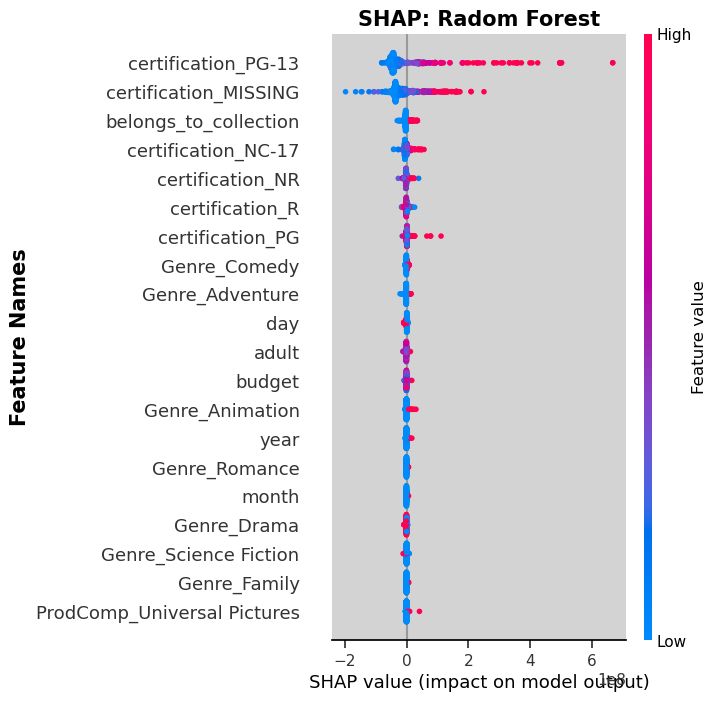

In [300]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,X_shap, show=False, plot_size=(7,7))

ax.set_title('SHAP: Radom Forest', fontsize = 15, weight = 'bold')
ax.set_ylabel('Feature Names', fontsize = 15, fontweight='bold')
ax.set_facecolor("lightgray")
savefig('Image/rf_importance.png',ax=ax, facecolor='white')

### Observation 

It's not informative, we only can say been movies that have an MPAA Rating of PG and PG-13 make the most revenue. 